In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Task 2.3

In [9]:
from LinearController_ import LinearController

controller = LinearController.get_linear_controller()
controller.get_params()

# load controller
controller.p = np.array([ 1.16966667,  1.66711111, 18.57933333,  2.75249383])

In [324]:
from CartPole_ import CartPole
from task4 import UNSTABLE_EQ

target = CartPole(False)
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller.get_params()
# p0 = np.array([ 0.76193829,  1.19125407, 16.33103061,  2.49340746])

controller.fit(target, x0, p0, n_steps=50, verbose=False, loss_func=LinearController.total_loss)
p_opt = controller.get_params()
p_opt

array([1., 1., 1., 1.])

In [325]:
LinearController.total_loss(p_opt, target, x0, n_steps=50, min_loss=0, training=False)

50.39346934028736

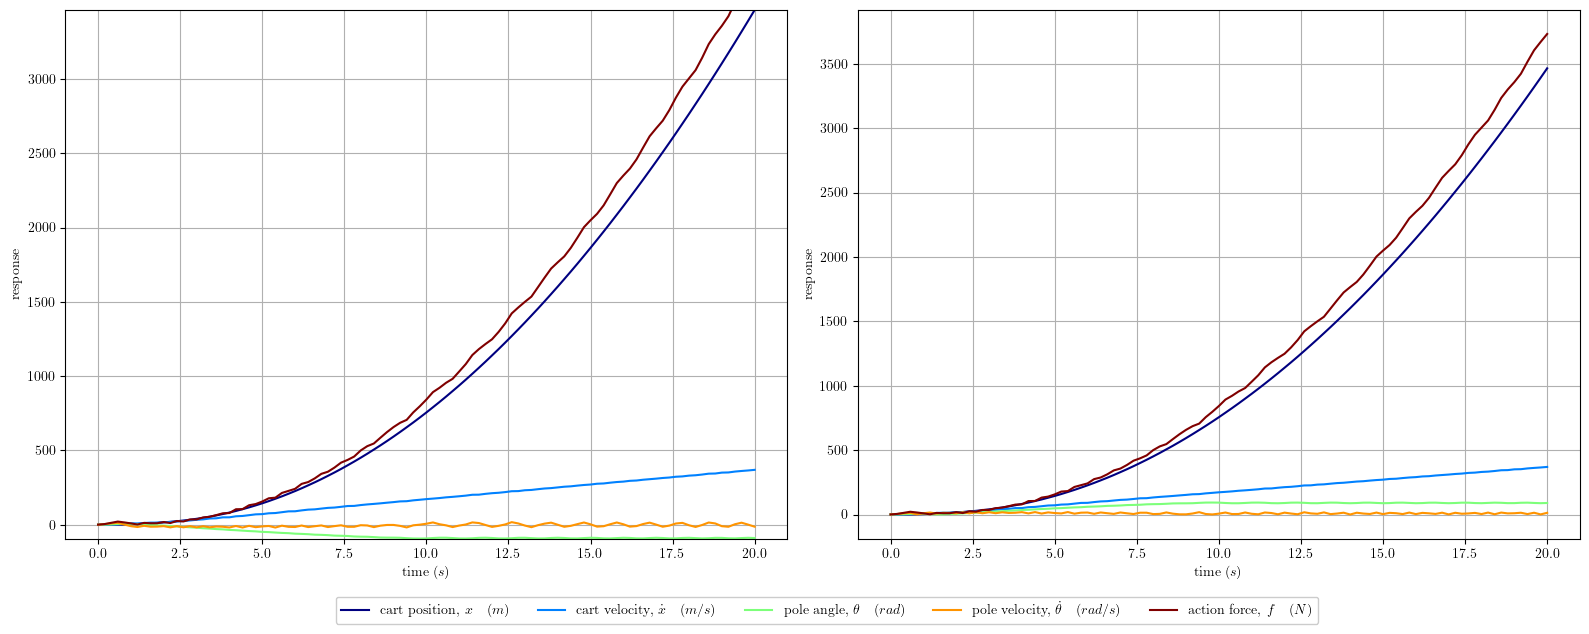

In [326]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

linear_model_linear_policy_rollout(target, x0, p_opt, fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_3__1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

### Initial attemps at performing global optimization

In [328]:
# Now try scanning the entire space

controller.reset()

l1 = (0, 2)
l2 = (0, 2)
l3 = (14, 18)
l4 = (2, 4)

controller.fit_global_minima(target, x0, n_steps=50, n=2, limits=(l1, l2, l3, l4), loss_func=LinearController.total_loss)

In [330]:
controller.print_local_minima_losses()

Minima: (-0.00027465482867931537, 0.0006685836221296604, 18.86325429642182, 1.5721607063807856), loss: 47.81953127008715
Minima: (0.0, 0.0, 14.0, 4.0), loss: 50.393310814828645
Minima: (0.0, 0.0, 18.0, 2.0), loss: 50.265248928736504
Minima: (0.0, 0.0, 18.0, 4.0), loss: 50.39346934028735
Minima: (0.0, 2.0, 14.0, 2.0), loss: 50.3933490530827
Minima: (0.0, 2.0, 14.0, 4.0), loss: 50.37566419605002
Minima: (0.0, 2.0, 18.0, 2.0), loss: 50.39346934028735
Minima: (0.0, 2.0, 18.0, 4.0), loss: 50.3933959463844
Minima: (2.0, 0.0, 14.0, 2.0), loss: 50.392877022114995
Minima: (2.0, 0.0, 14.0, 4.0), loss: 50.39311259120821
Minima: (2.0, 0.0, 18.0, 2.0), loss: 49.37692653789648
Minima: (2.0, 0.0, 18.0, 4.0), loss: 50.39346934028735
Minima: (2.0, 2.0, 14.0, 2.0), loss: 50.3933490530827
Minima: (2.0, 2.0, 14.0, 4.0), loss: 50.390143460391286
Minima: (2.0, 2.0, 18.0, 2.0), loss: 50.39346934028735
Minima: (2.0, 2.0, 18.0, 4.0), loss: 50.39335862028045


In [331]:
controller.get_params()

array([-2.74654829e-04,  6.68583622e-04,  1.88632543e+01,  1.57216071e+00])

In [149]:
# Progressively decrease search space

controller.reset()
p_opt_prev = np.array([-2.74654829e-04,  6.68583622e-04,  1.88632543e+01,  1.57216071e+00])

l0 = np.array((-1e-4, 1e-4)) + p_opt_prev[0]
l1 = np.array((-1e-4, 1e-4)) + p_opt_prev[1]
l2 = np.array((-1e1, 1e1)) + p_opt_prev[2]
l3 = np.array((-1e0, 1e0)) + p_opt_prev[3]

controller.fit_global_minima(target, x0, n_steps=50, n=2, limits=(l0, l1, l2, l3))
controller.print_local_minima_losses()
controller.get_params()

Minima: (-0.000344093554119735, 0.0005361307376455728, 10.39718034288264, 0.5903556639593548), loss: 50.32361847558802
Minima: (-0.000374654829, 0.0005685836219999999, 8.863254300000001, 2.57216071), loss: 50.36844852305006
Minima: (-0.000374654829, 0.0005685836219999999, 28.8632543, 0.5721607099999999), loss: 50.39346934028737
Minima: (-0.000374654829, 0.0005685836219999999, 28.8632543, 2.57216071), loss: 50.38496288519005
Minima: (-0.000374654829, 0.000768583622, 8.863254300000001, 0.5721607099999999), loss: 50.36844913482997
Minima: (-0.000374654829, 0.000768583622, 8.863254300000001, 2.57216071), loss: 50.36844852291421
Minima: (-0.000374654829, 0.000768583622, 28.8632543, 0.5721607099999999), loss: 50.39346934028737
Minima: (-0.000374654829, 0.000768583622, 28.8632543, 2.57216071), loss: 50.38496612156502
Minima: (-0.000174654829, 0.0005685836219999999, 8.863254300000001, 0.5721607099999999), loss: 50.368449134830975
Minima: (-0.000174654829, 0.0005685836219999999, 8.8632543000000

array([-3.44093554e-04,  5.36130738e-04,  1.03971803e+01,  5.90355664e-01])

In [151]:
# Progressively decrease search space

controller.reset()
p_opt_prev = np.array([-2.74654829e-04,  6.68583622e-04,  1.88632543e+01,  1.57216071e+00])
print("Previous optimal loss:", LinearController.total_loss(p_opt_prev, target, x0, n_steps=50, min_loss=0, training=False))

l0 = np.array((-1e-3, 1e-3)) + p_opt_prev[0]
l1 = np.array((-1e-3, 1e-3)) + p_opt_prev[1]
l2 = np.array((-1e1, 1e1)) + p_opt_prev[2]
l3 = np.array((-1e0, 1e0)) + p_opt_prev[3]

controller.fit_global_minima(target, x0, n_steps=50, n=2, limits=(l0, l1, l2, l3))
controller.print_local_minima_losses()
controller.get_params()

Previous optimal loss: 47.819531299345954
Minima: (-0.0012539828867130665, -0.00030438214210101516, 10.39718034288264, 0.5903556639593548), loss: 50.32361848588604
Minima: (-0.001274654829, -0.0003314163780000001, 8.863254300000001, 2.57216071), loss: 50.36844852372447
Minima: (-0.001274654829, -0.0003314163780000001, 28.8632543, 0.5721607099999999), loss: 50.39346934028737
Minima: (-0.001274654829, -0.0003314163780000001, 28.8632543, 2.57216071), loss: 50.38494691462812
Minima: (-0.001274654829, 0.001668583622, 8.863254300000001, 0.5721607099999999), loss: 50.36844913482547
Minima: (-0.001274654829, 0.001668583622, 8.863254300000001, 2.57216071), loss: 50.368448522365895
Minima: (-0.001274654829, 0.001668583622, 28.8632543, 0.5721607099999999), loss: 50.39346934028737
Minima: (-0.001274654829, 0.001668583622, 28.8632543, 2.57216071), loss: 50.38497927806365
Minima: (0.000725345171, -0.0003314163780000001, 8.863254300000001, 0.5721607099999999), loss: 50.36844913483547
Minima: (0.00072

array([-1.25398289e-03, -3.04382142e-04,  1.03971803e+01,  5.90355664e-01])

In [156]:
controller.reset()

l0 = (0, 2)
l1 = (0, 2)
l2 = (14, 18)
l3 = (2, 4)

controller.fit_global_minima(target, x0, n_steps=50, n=4, limits=(l0, l1, l2, l3))
controller.get_params(), controller.get_global_minima_loss() 

(array([ 1.82873691,  2.20081729, 19.37286425,  3.02056812]),
 5.3996649363500255)

In [157]:
# To test reset is working
# controller.reset()
# controller.get_params(), controller.get_global_minima_loss() 

(array([ 1.82873691,  2.20081729, 19.37286425,  3.02056812]),
 5.3996649363500255)

In [160]:
from sanitycheck import get_next_search_space

get_next_search_space(controller.get_params(), factor=10)

[[1.6458632182176494, 2.0116106000437934],
 [1.9807355650568543, 2.4208990239583774],
 [17.435577826537376, 21.31015067687901],
 [2.718511309420045, 3.3226249337356104]]

In [162]:
# Progressively decrease search space

controller.reset()
p_opt_prev = controller.get_params()
print("Previous optimal loss:", controller.get_global_minima_loss())

controller.fit_global_minima(target, x0, n_steps=50, n=4, limits=get_next_search_space(p_opt_prev, factor=10))
controller.get_params(), controller.get_global_minima_loss() 

Previous optimal loss: 3.88021825626842


(array([ 2.54524329,  3.28395305, 22.68034501,  3.60490931]), 3.88021825626842)

In [163]:
# Progressively decrease search space

controller.reset()
p_opt_prev = controller.get_params()
print("Previous optimal loss:", controller.get_global_minima_loss())

controller.fit_global_minima(target, x0, n_steps=50, n=4, limits=get_next_search_space(p_opt_prev, factor=10))
controller.get_params(), controller.get_global_minima_loss() 

Previous optimal loss: 3.88021825626842


(array([ 2.54524329,  3.28395305, 22.68034501,  3.60490931]), 3.88021825626842)

In [168]:
# Test multi level search

controller.reset(reset_optimum=True)
l0 = (0, 2)
l1 = (0, 2)
l2 = (14, 18)
l3 = (2, 4)

target = CartPole(False)
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller.get_params()

controller.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=(l0, l1, l2, l3))

Optimal params: [ 1.82871014  2.20080461 19.37287195  3.02055939]
Optimal loss: 5.399664934632228
Optimal params: [ 2.61948772  3.27259955 22.68978217  3.60250631]
Optimal loss: 3.8821451907779156
----- RESULTS -----
No. epochs: 3
Optimal params: [ 2.61948772  3.27259955 22.68978217  3.60250631]
Optimal loss: 3.8821451907779156


[0.  0.  0.5 0. ] [ 2.61948772  3.27259955 22.68978217  3.60250631]


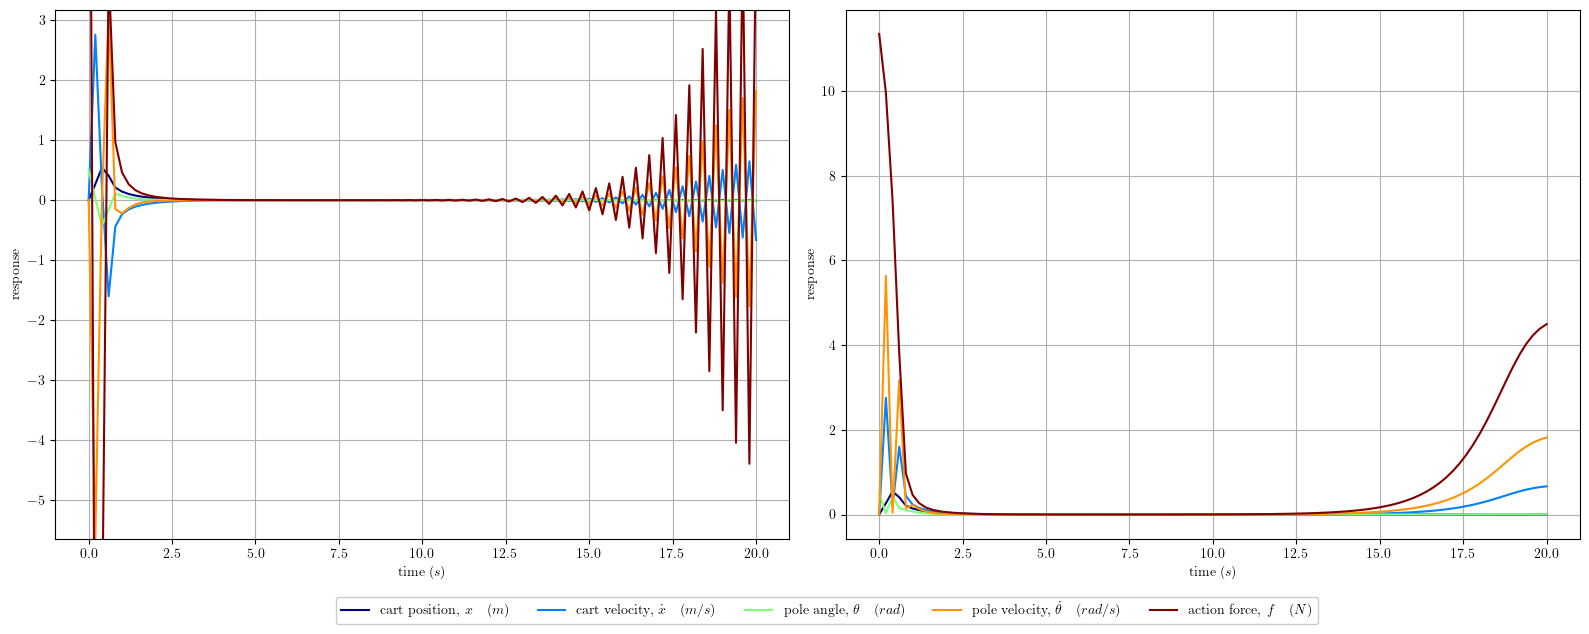

In [173]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

p_opt = controller.get_params()
linear_model_linear_policy_rollout(target, x0, p_opt, fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_3__2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [183]:
# Previous one was not optimal
controller.reset(reset_optimum=True)

p_opt = np.array([ 0.76193829,  1.19125407, 16.33103061,  2.49340746])
limits = get_next_search_space(p_opt)

# Increase n_steps to 20
controller.fit_global_minima_multi_level(target, x0, n_steps=100, n=5, max_epochs=10, factor=10, limits=limits)

Optimal params: [ 1.82871121  2.20080274 19.37285619  3.02055773]
Optimal loss: 5.3996649357858555
Optimal params: [ 2.10710694  2.8026033  22.10080241  3.37599558]
Optimal loss: 4.131518634193761
Optimal params: [ 2.36506399  3.13814817 22.50885002  3.53322014]
Optimal loss: 3.9118552166485987
----- RESULTS -----
No. epochs: 4
Optimal params: [ 2.36506399  3.13814817 22.50885002  3.53322014]
Optimal loss: 3.9118552166485987


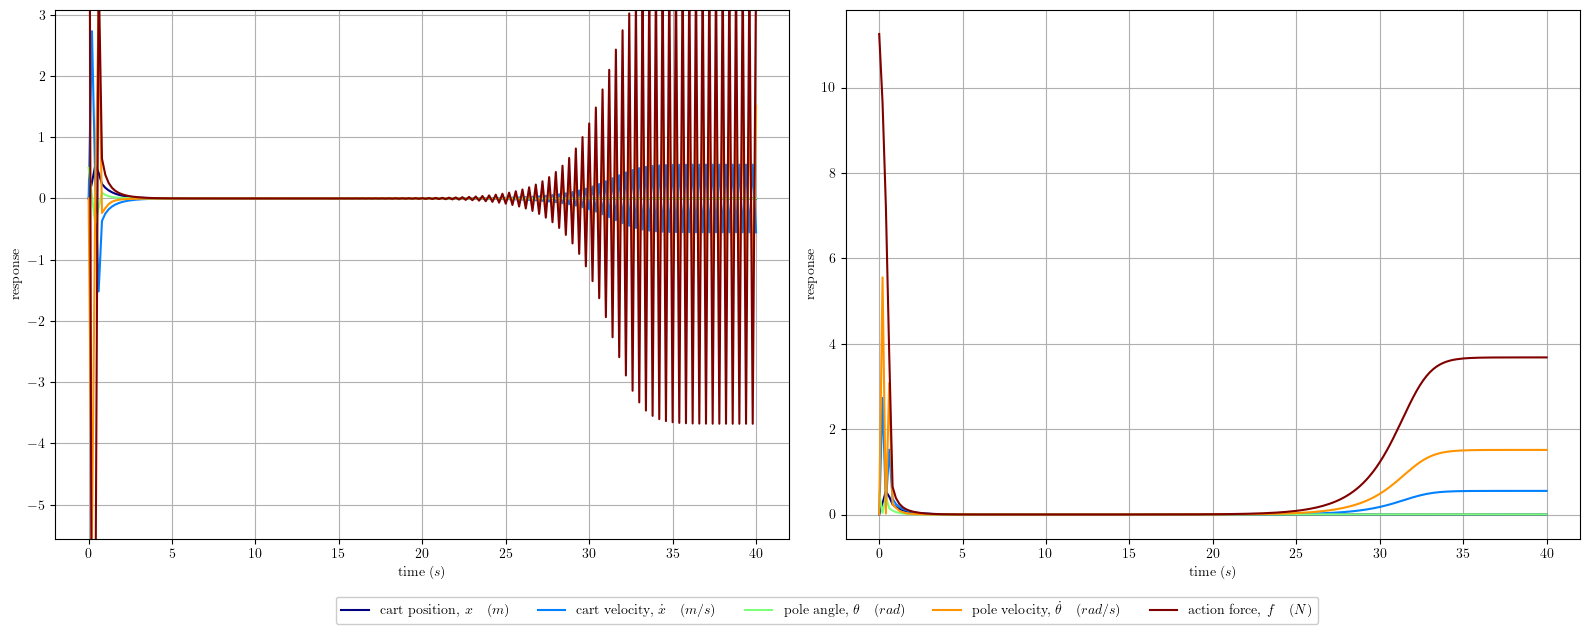

In [188]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

p_opt = controller.get_params()
linear_model_linear_policy_rollout(target, x0, p_opt, fig, axs, n_steps=200)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_3__3.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

### Finally found a feasible solution

In [332]:
controller.reset(reset_optimum=True)
l0 = (0, 1)
l1 = (0, 2)
l2 = (14, 18)
l3 = (2, 4)

target = CartPole(False)
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller.get_params()

# Try constraint loss
controller.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=(l0, l1, l2, l3), loss_func=LinearController.total_loss_2)

Optimal params: [ 1.          1.33333333 18.          2.66666667]
Optimal loss: 7.336374611438038
Optimal params: [ 1.1         1.37777778 17.4         2.57777778]
Optimal loss: 6.407065871681019
Optimal params: [ 1.06333333  1.51555556 17.98        2.6637037 ]
Optimal loss: 6.140033511749183
Optimal params: [ 1.16966667  1.66711111 18.57933333  2.75249383]
Optimal loss: 5.920364471115618
----- RESULTS -----
No. epochs: 5
Optimal params: [ 1.16966667  1.66711111 18.57933333  2.75249383]
Optimal loss: 5.920364471115618


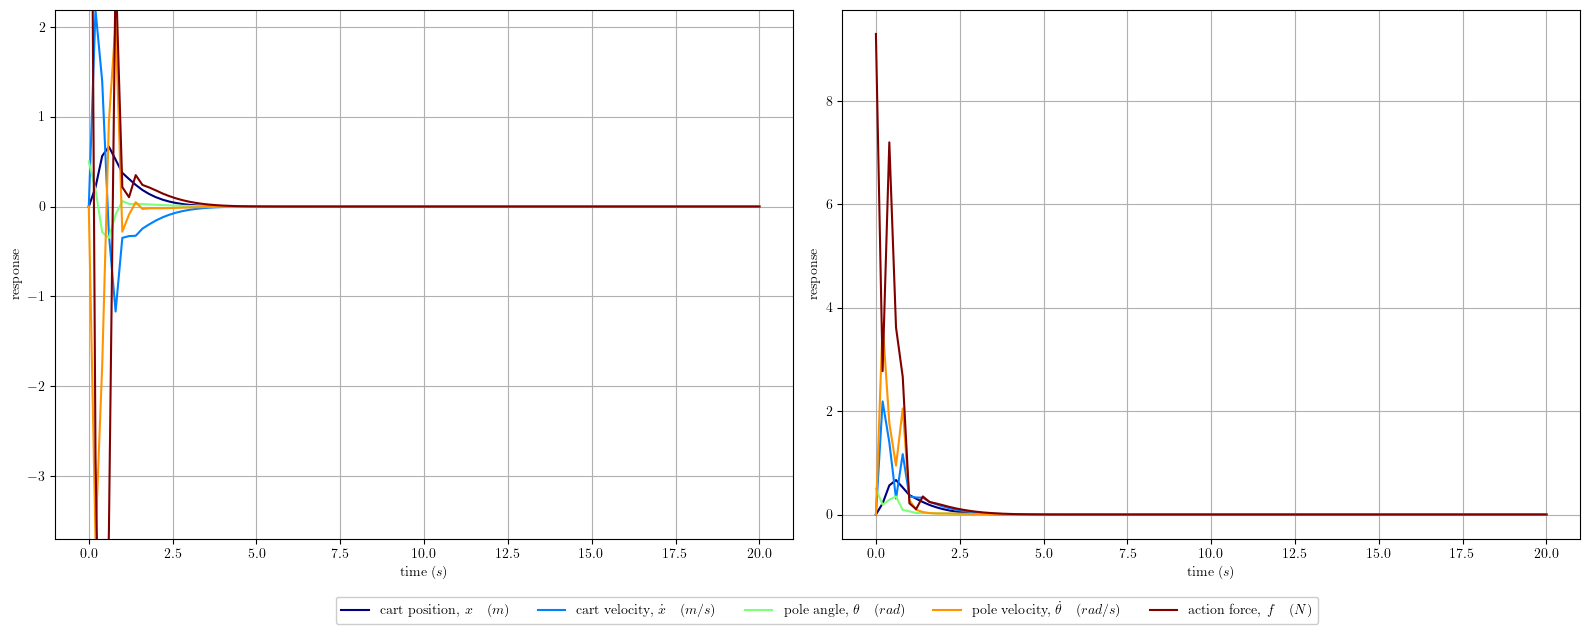

In [333]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller.simulate_rollout(target, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))

fig.savefig("./assets5/task2_3__4.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## This is an optimal point obtained from the sanity check notebook

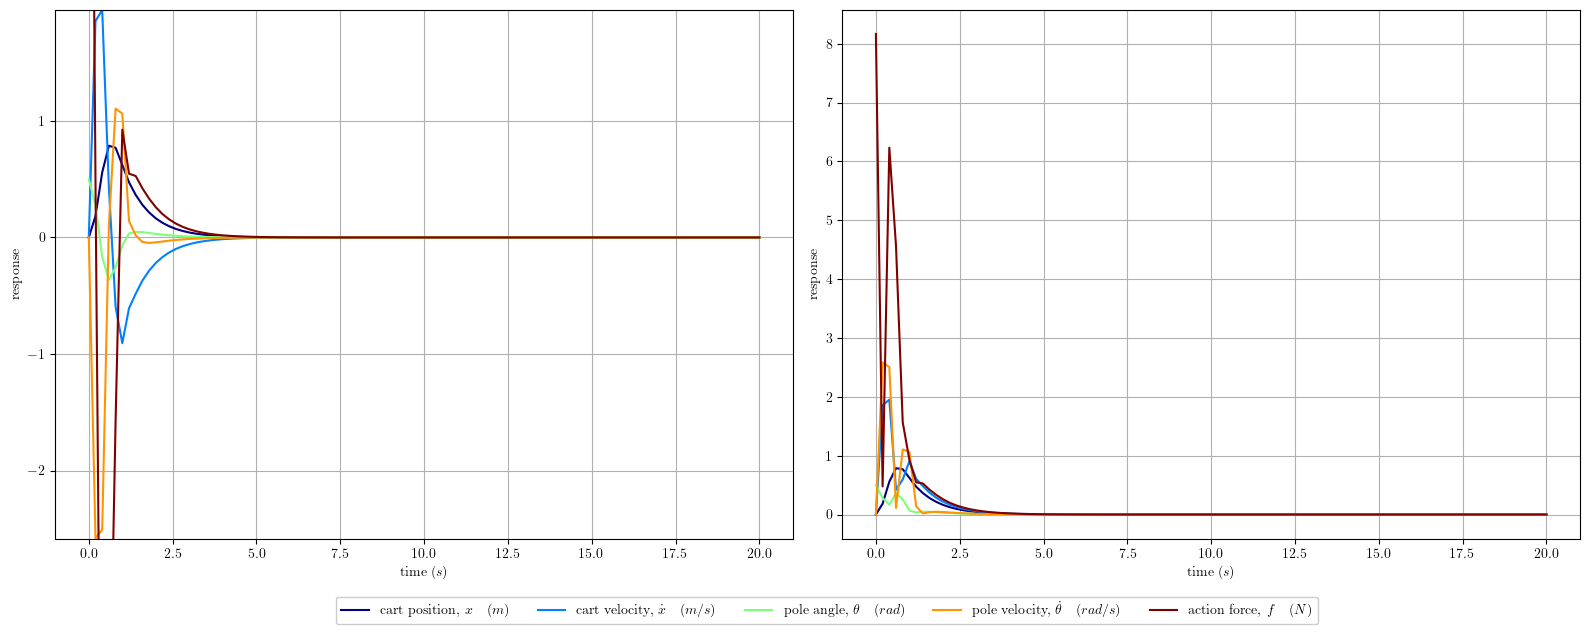

In [334]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

p_opt = np.array([ 0.76193829,  1.19125407, 16.33103061,  2.49340746])
linear_model_linear_policy_rollout(target, x0, p_opt, fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_3__11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Task 2.4

## Setup model

In [302]:
from NonLinearObserver_ import NonLinearObserver
from CartPole_ import CartPole

target = CartPole(False)
model = NonLinearObserver(False)

In [303]:
delta_x_hat, delta_x = model.fit(target, enable_remap=True)
print(model.mse)

0.004996105624284596


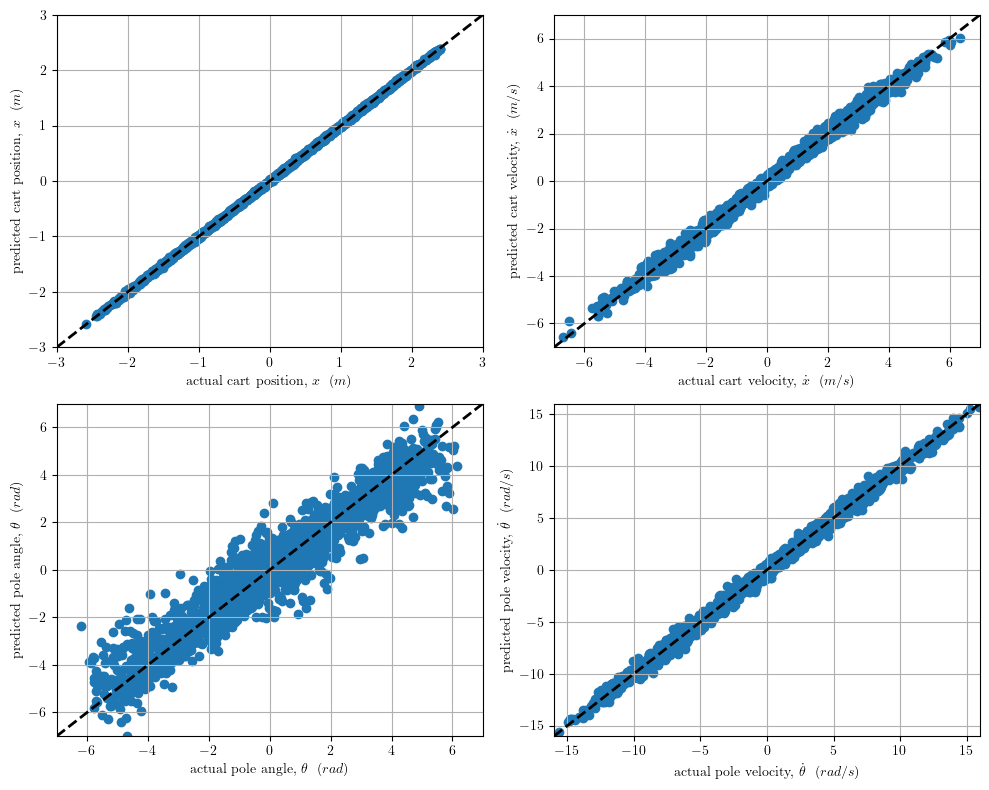

In [111]:
from task4 import t4_check_fit_plotter

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t4_check_fit_plotter(delta_x, delta_x_hat, axs, fig)

fig.savefig("./assets5/task2_4__1.png", bbox_inches='tight')

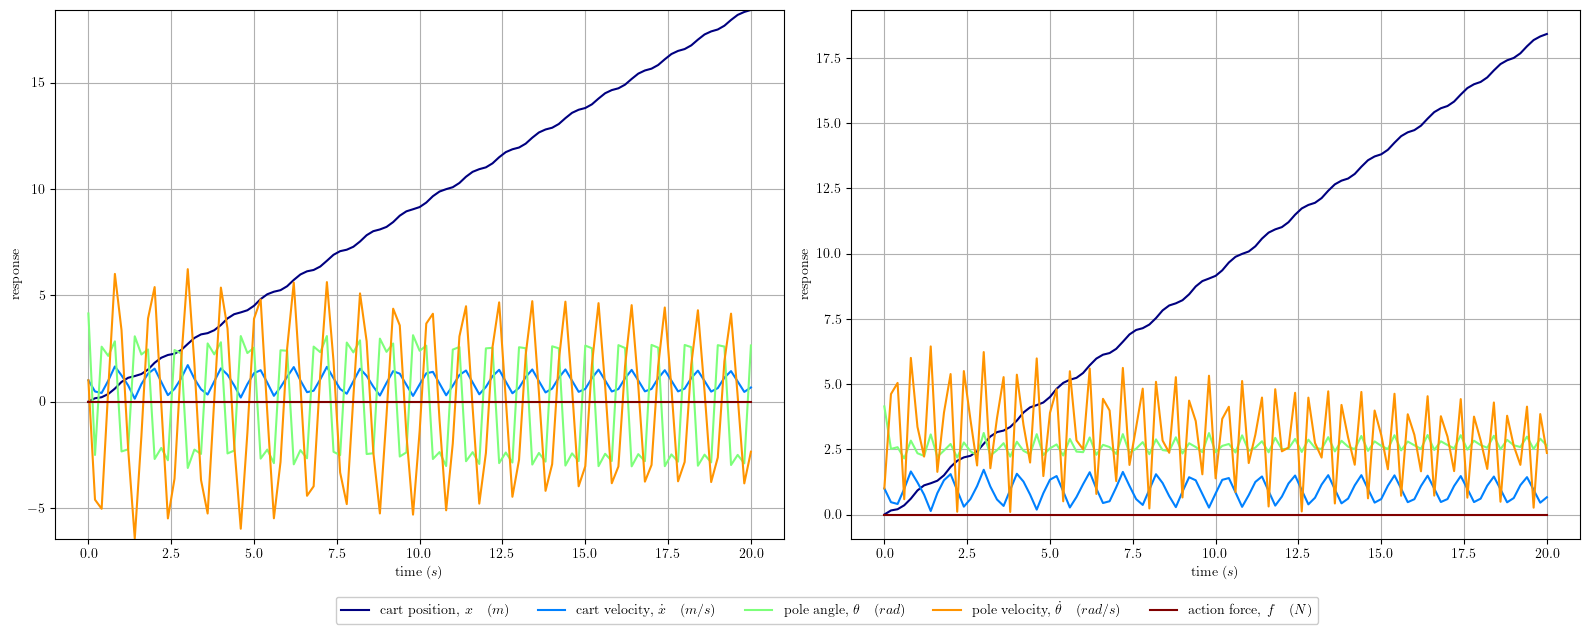

In [112]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

linear_model_linear_policy_rollout(target, [0, 1, np.pi+1, 1], [0, 0, 0, 0], fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
# fig.savefig("./assets5/task2_4__100.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

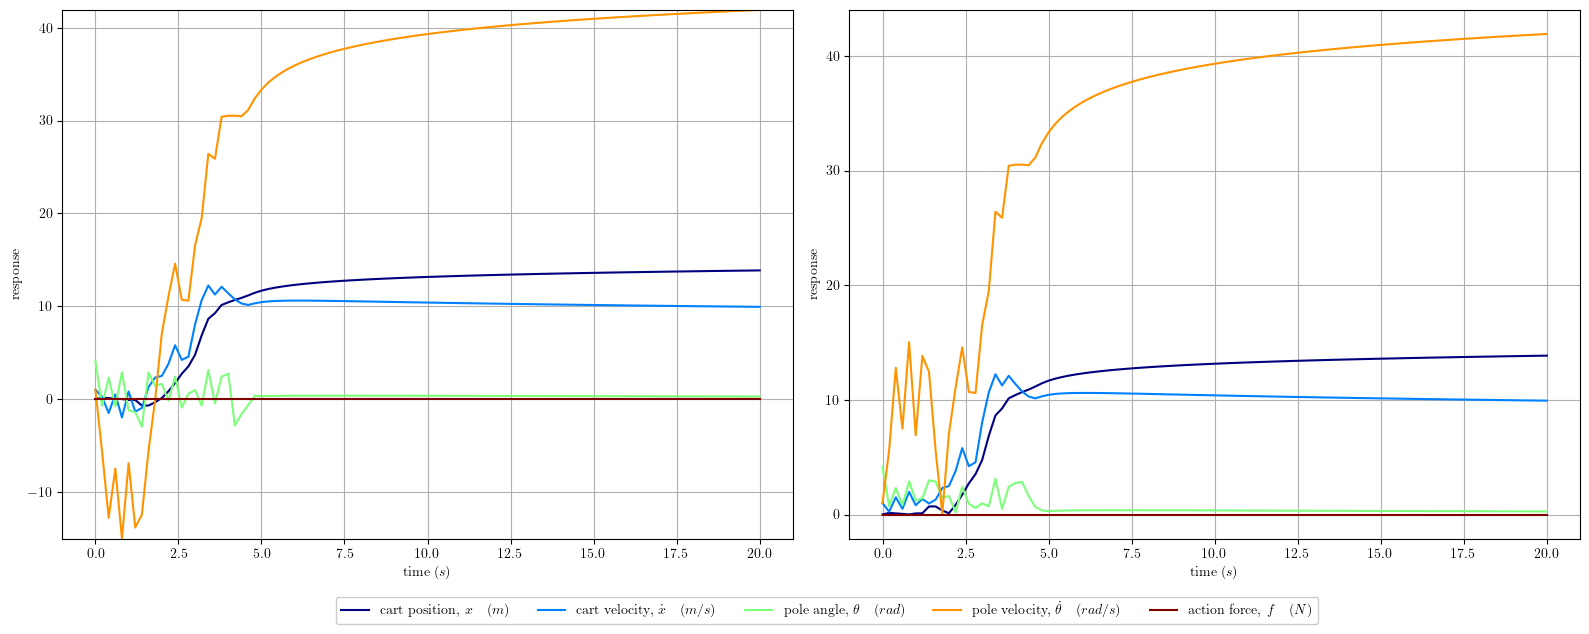

In [113]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

linear_model_linear_policy_rollout(model, [0, 1, np.pi+1, 1], [0, 0, 0, 0], fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
# fig.savefig("./assets5/task2_4__100.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Point of divergence: (8.00, 7.98, 13.33), (0.40, 2.37, 0.67), (10.00, 3.10, 16.67), (1.00, -7.19, 1.67)


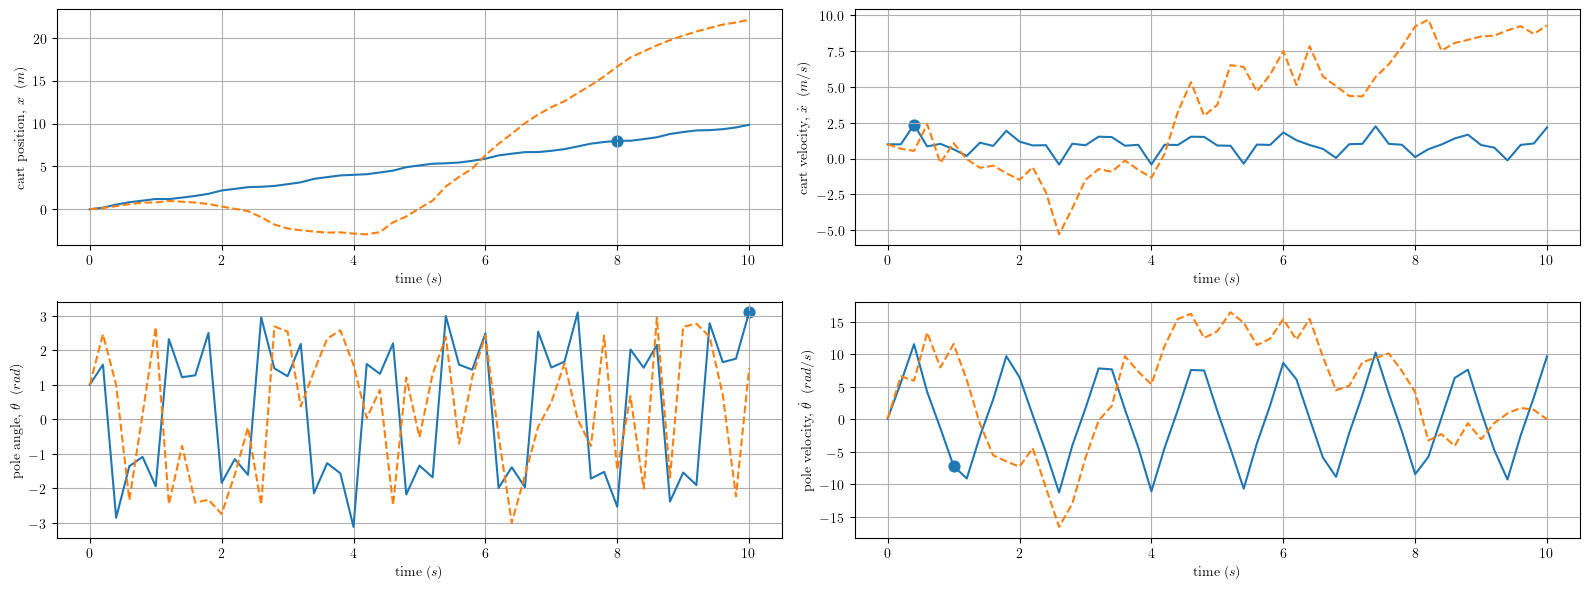

In [114]:
from sanitycheck import linear_model_linear_policy_rollout
from task2 import t2_1_roll_out

fig, axs = plt.subplots(2, 2, figsize=(16, 6), layout='tight')

x0 = np.array([0, 1, 1, 0.1])
steps, states_hist, action_hist, colors = controller.simulate_rollout(target, x0, n_steps=50, enable_remap=True, p=[0, 0, 0, 0])
steps, states_hist_hat, action_hist, colors = controller.simulate_rollout(model, x0, n_steps=50, enable_remap=True, p=[0, 0, 0, 0])

t2_1_roll_out(steps, states_hist, states_hist_hat, fig=fig, axs=axs, xlabel=r"time $(s)$")


## Setup controller

In [115]:
from LinearController_ import LinearController
from task2 import UNSTABLE_EQ


x0 = UNSTABLE_EQ
x0[2] = 0.5
print(x0)

controller_2 = LinearController.get_linear_controller()
controller_2.get_params()

[0.  0.  0.5 0. ]


array([1., 1., 1., 1.])

## Using the same policy on the model

Eventual pole angle: 1.4525379696260985


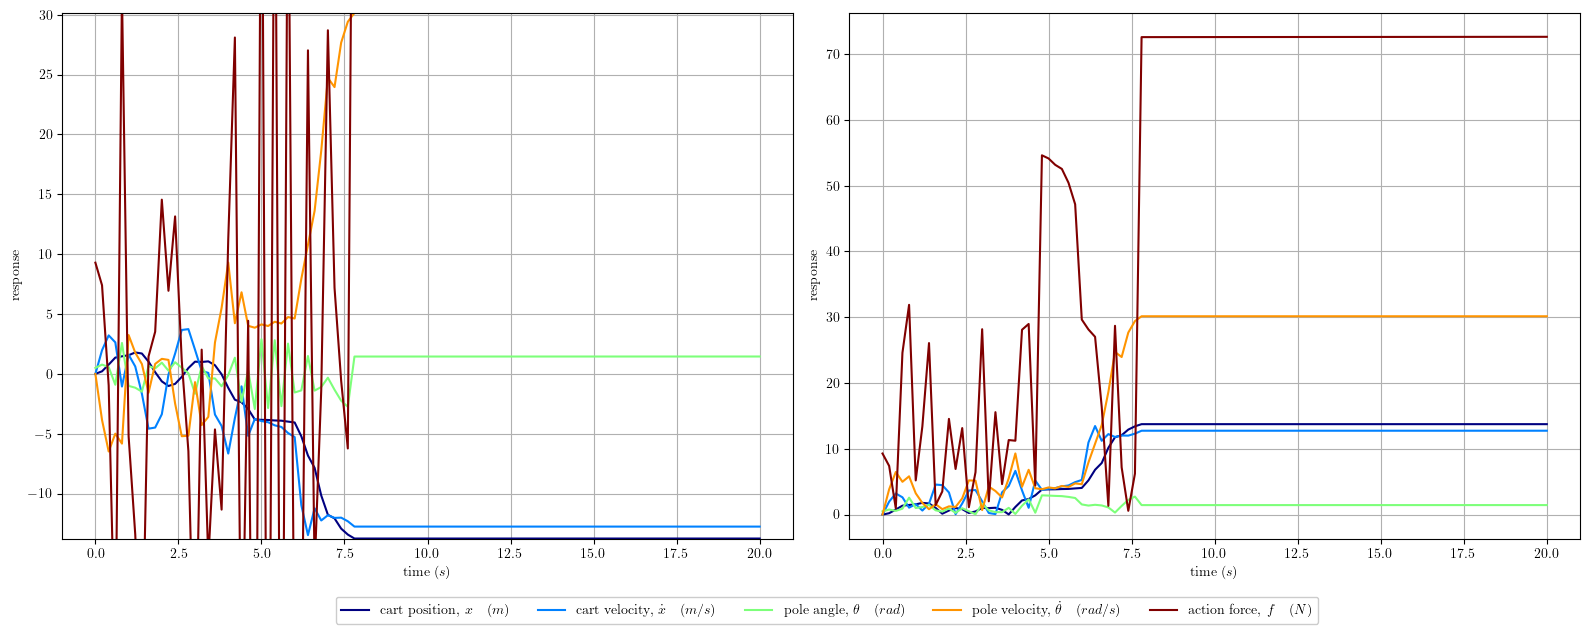

In [119]:
from sanitycheck import linear_model_linear_policy_rollout_plotter
# Not working
fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

## Fit controller to model

In [174]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller.get_params() # From previous target fit
limits = get_next_search_space(p0)

# Reduce factor from 10 to 0.8 to escape local minima
controller_2.reset(reset_optimum=True)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=0.5, limits=limits, loss_func=LinearController.total_loss_3)

Optimal params: [ 1.0527      1.72268148 16.7214      2.84424362]
Optimal loss: 48.935768967379026
Optimal params: [-1.0527     -1.72268148 27.86899999  0.94808121]
Optimal loss: 47.83314883111609
----- RESULTS -----
No. epochs: 3
Optimal params: [-1.0527     -1.72268148 27.86899999  0.94808121]
Optimal loss: 47.83314883111609


In [176]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss)

Optimal params: [-1.15763075 -1.89476457 29.16075355  1.04227826]
Optimal loss: 47.26665011783228
Optimal params: [-1.27737319 -2.18193983 30.13277866  1.14650609]
Optimal loss: 46.88966345399404
Optimal params: [-1.14963587 -2.25467116 30.58477034  1.2611567 ]
Optimal loss: 46.88343576397578
----- RESULTS -----
No. epochs: 3
Optimal params: [-1.14963587 -2.25467116 30.58477034  1.2611567 ]
Optimal loss: 46.88343576397578


In [178]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_3)

----- RESULTS -----
No. epochs: 1
Optimal params: [-1.14963587 -2.25467116 30.58477034  1.2611567 ]
Optimal loss: 46.88343576397578


Eventual pole angle: -2.7786043622569823


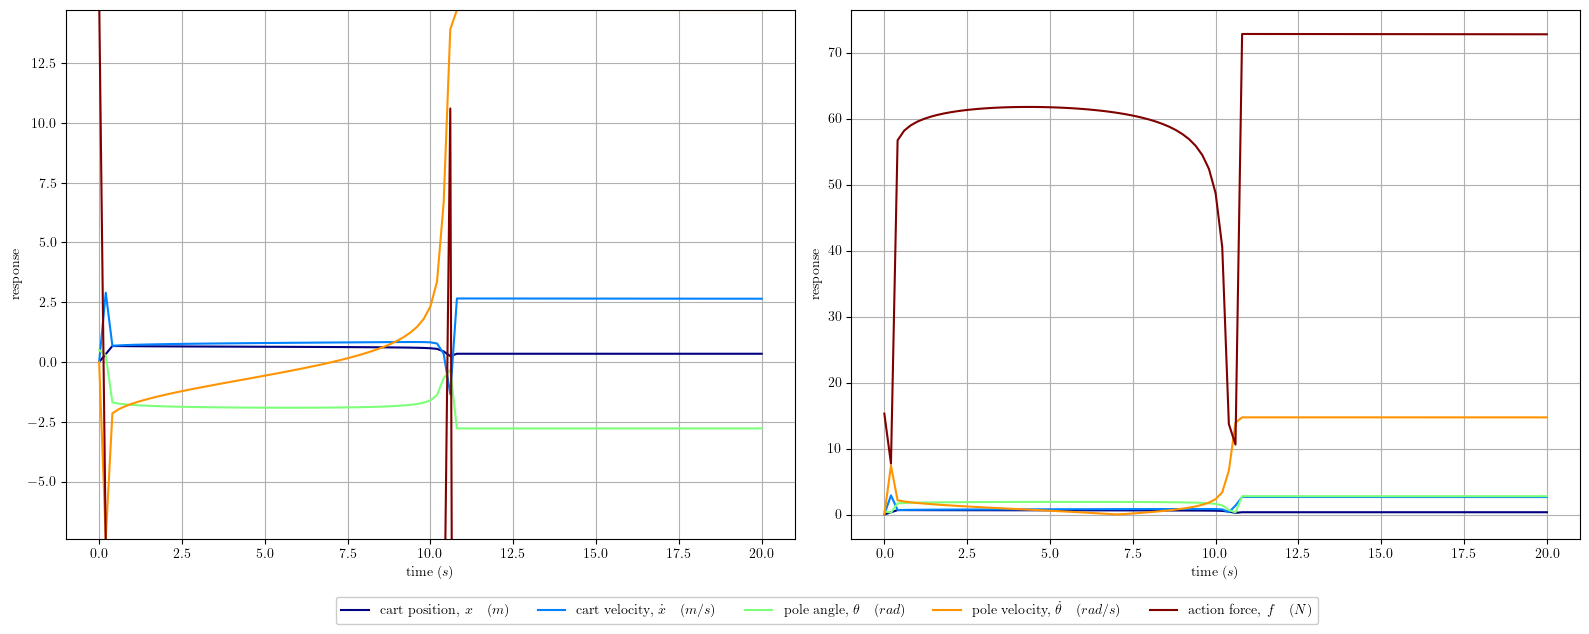

In [177]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_2.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [184]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
p0[2] = p0[2] / 2
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=0.5, limits=limits, loss_func=LinearController.total_loss_3)


----- RESULTS -----
No. epochs: 1
Optimal params: [-1.14963587 -2.25467116  3.82309629  1.2611567 ]
Optimal loss: 46.88343576397578


In [185]:
controller_2.get_params()


array([-1.14963587, -2.25467116,  3.82309629,  1.2611567 ])

Eventual pole angle: 2.373219064198924


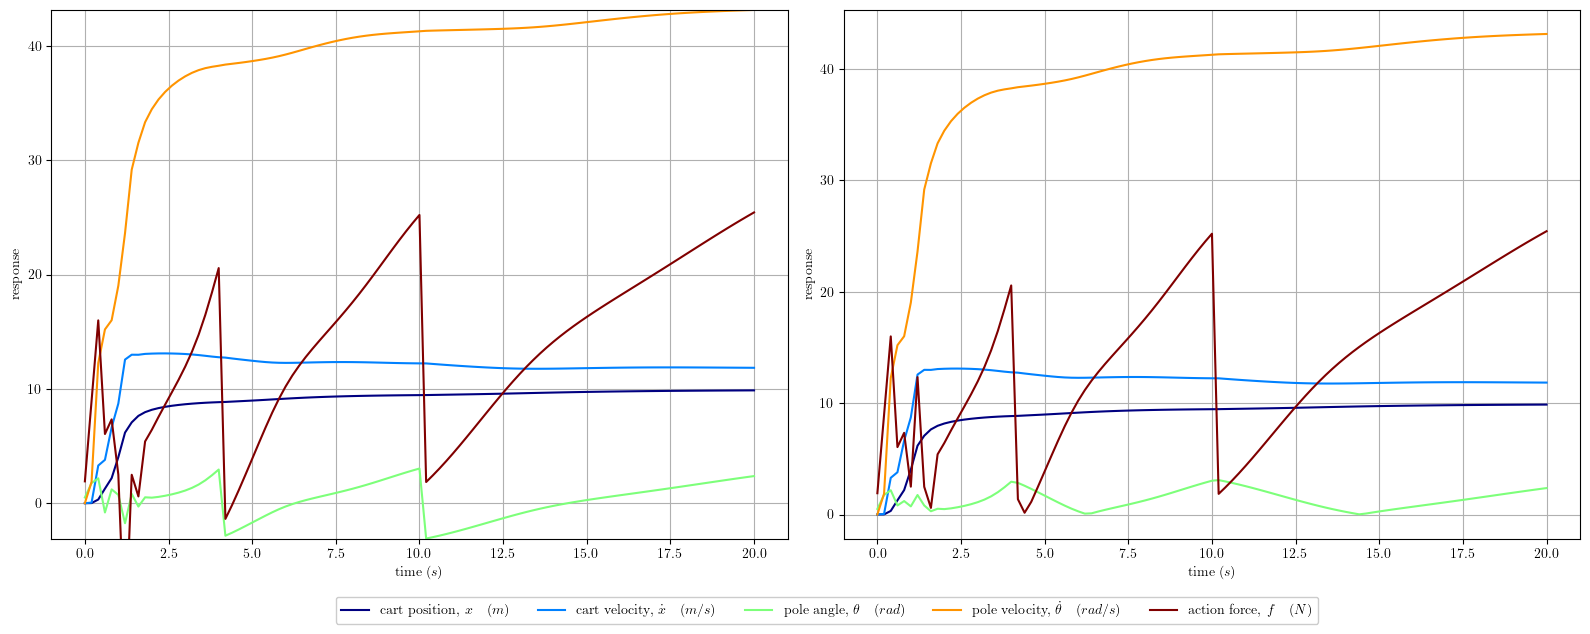

In [186]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_2.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

### Start from [2, 4, 20, 4]

In [151]:
from sanitycheck import get_next_search_space

controller_2.reset(reset_optimum=True)
p0 = [ 2.0, 4.0, 20.0, 4.0 ]
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=2.0, limits=limits, loss_func=LinearController.total_loss_3)



Optimal params: [ 1.8         3.86666667 20.66666667  4.4       ]
Optimal loss: 50.16217655715741
Optimal params: [ 0.9         1.93333333 31.          6.6       ]
Optimal loss: 49.86078444426303
Optimal params: [ 1.05  2.9  15.5   3.3 ]
Optimal loss: 48.87495421393102
----- RESULTS -----
No. epochs: 4
Optimal params: [ 1.05  2.9  15.5   3.3 ]
Optimal loss: 48.87495421393102


In [158]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=0.8, limits=limits, loss_func=LinearController.total_loss_3)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 1.05  2.9  15.5   3.3 ]
Optimal loss: 48.87495421393102


Eventual pole angle: 2.41573116373372


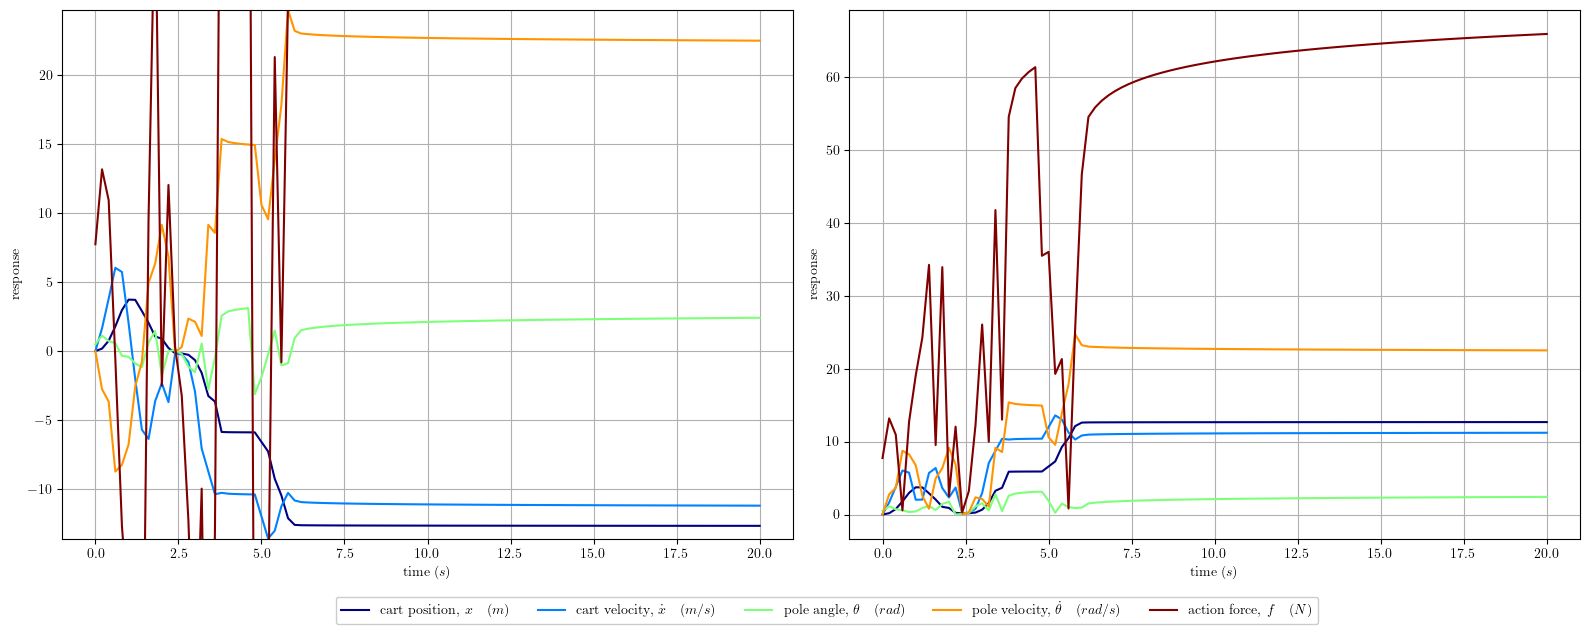

In [153]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_2.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__22.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

### Start from [2.42, 3.82, 22.41, 3.96] 

In [188]:
from sanitycheck import get_next_search_space

controller_2.reset(reset_optimum=True)
p0 = [ 2.42, 3.82, 22.41, 3.96 ] # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_3)

Optimal params: [ 2.33933333  3.438      20.169       4.356     ]
Optimal loss: 49.95895425458821
Optimal params: [ 2.26135556  3.3234     18.1521      4.2108    ]
Optimal loss: 49.94791993448774
----- RESULTS -----
No. epochs: 2
Optimal params: [ 2.26135556  3.3234     18.1521      4.2108    ]
Optimal loss: 49.94791993448774


In [129]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_3)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 2.178       3.94733333 23.157       4.092     ]
Optimal loss: 49.3523459639529


In [130]:
from sanitycheck import get_next_search_space

p0 = controller_2.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_2.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_3)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 2.178       3.94733333 23.157       4.092     ]
Optimal loss: 49.3523459639529


Eventual pole angle: 2.407472930326764


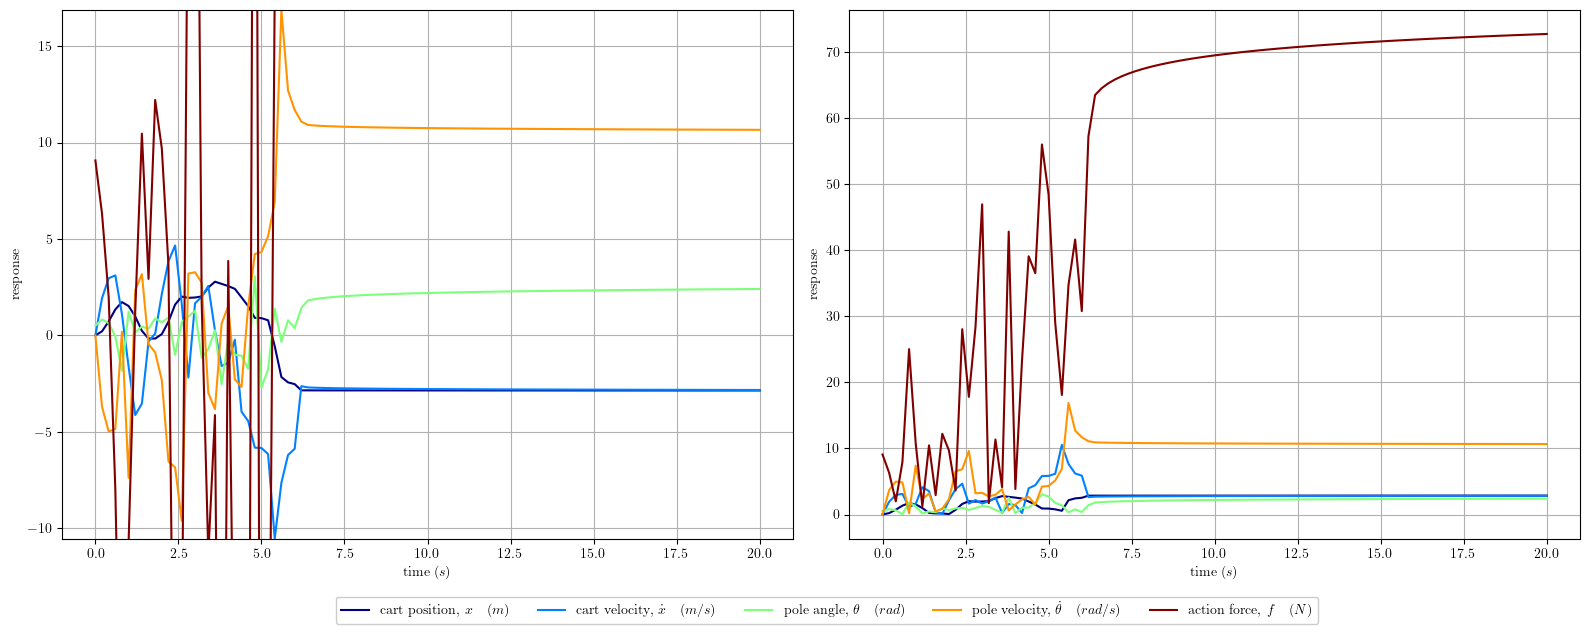

In [189]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_2.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__23.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

## Try model optimized policy on actual system

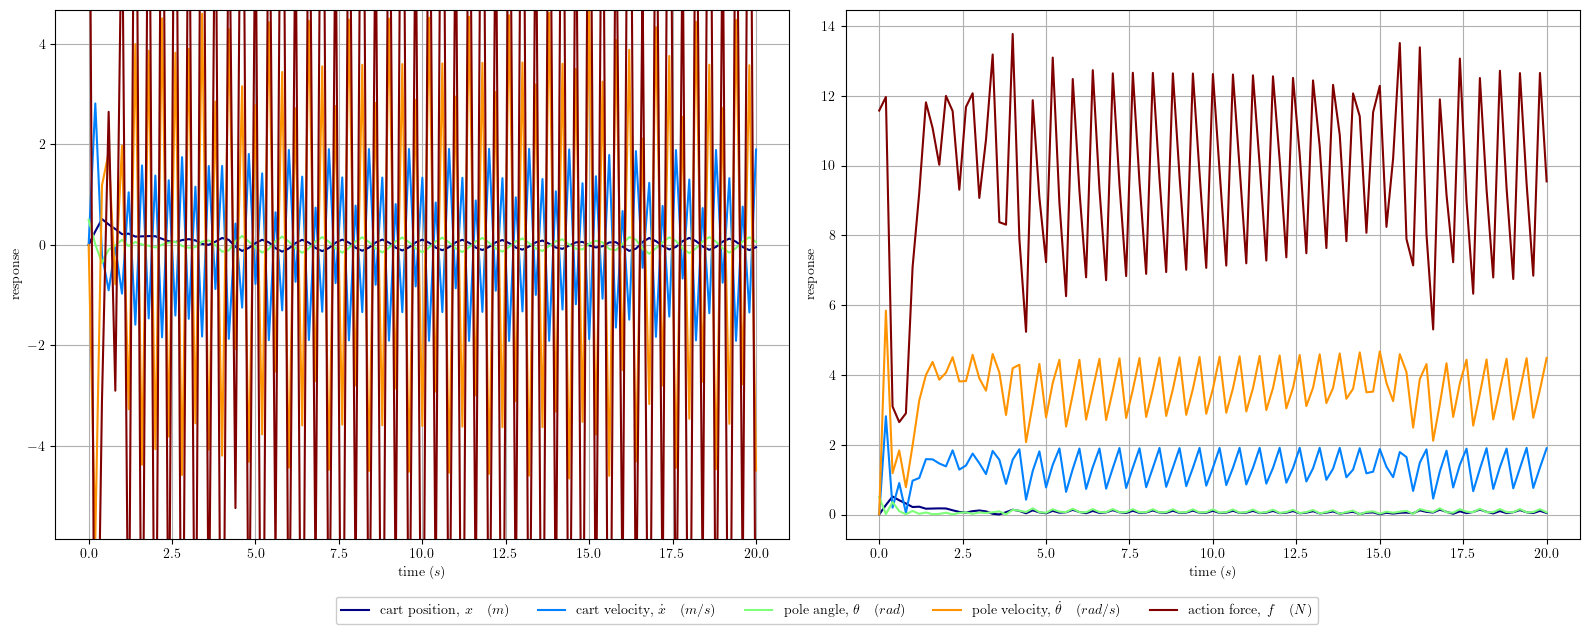

In [191]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')


p_opt = [2.178, 3.94733333, 23.157, 4.092]
# p_opt = [ 1.05,  2.9,  15.5,   3.3 ]

steps, states_hist, action_hist, colors = controller_2.simulate_rollout(target, x0, n_steps=100, p=p_opt)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task2_4__31.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## Need to speed up model simulation speed 

In [287]:
# from numba import njit

In [307]:
# %%time

# target.setState(x0)
# action = LinearController._eval(x0, controller.get_params())

# for _ in range(50):
#     target.performAction(action)
#     state = target.getState()
#     action = LinearController._eval(state, controller.get_params())


CPU times: user 6.58 ms, sys: 300 µs, total: 6.88 ms
Wall time: 6.75 ms


In [311]:
# %%time

# model.setState(x0)
# action = LinearController._eval(x0, controller_2.get_params())
# for _ in range(50):
#     model.performAction(action)
#     state = model.getState()
#     action = LinearController._eval(state, controller_2.get_params())


CPU times: user 4.79 ms, sys: 249 µs, total: 5.04 ms
Wall time: 4.81 ms


# Task 3.1

In [207]:
from CartPoleNoise_ import CartPoleGaussianNoisyObs

target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)

controller_3 = LinearController.get_linear_controller()


In [232]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller.get_params() # From previous target fit
limits = get_next_search_space(p0)

# Try constraint loss
controller_3.reset(reset_optimum=True)
controller_3.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)



Optimal params: [ 1.0527      1.5004     16.7214      2.47724445]
Optimal loss: 50.99997246355046
Optimal params: [ 0.94743  1.35036 15.04926  2.22952]
Optimal loss: 50.999972463344264
----- RESULTS -----
No. epochs: 2
Optimal params: [ 0.94743  1.35036 15.04926  2.22952]
Optimal loss: 50.999972463344264


In [233]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() # From previous target fit
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

Optimal params: [ 0.852687    1.305348   16.554186    2.30383734]
Optimal loss: 50.10050953512405
----- RESULTS -----
No. epochs: 2
Optimal params: [ 0.852687    1.305348   16.554186    2.30383734]
Optimal loss: 50.10050953512405


In [ ]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() * 2 # Try increasing the policy for a faster response (prevent velocity from exploding)
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

In [237]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() / 0.7 # Force too high, need to reeduce it
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

Optimal params: [ 2.41188609  3.02094823 47.24512131  6.51656846]
Optimal loss: 49.87635778698623
----- RESULTS -----
No. epochs: 2
Optimal params: [ 2.41188609  3.02094823 47.24512131  6.51656846]
Optimal loss: 49.87635778698623


In [239]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() / 0.7
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

Optimal params: [ 3.79010672  3.88407629 60.74372739  8.37844517]
Optimal loss: 49.588730077858585
----- RESULTS -----
No. epochs: 2
Optimal params: [ 3.79010672  3.88407629 60.74372739  8.37844517]
Optimal loss: 49.588730077858585


Eventual pole angle: -1.159159926189439


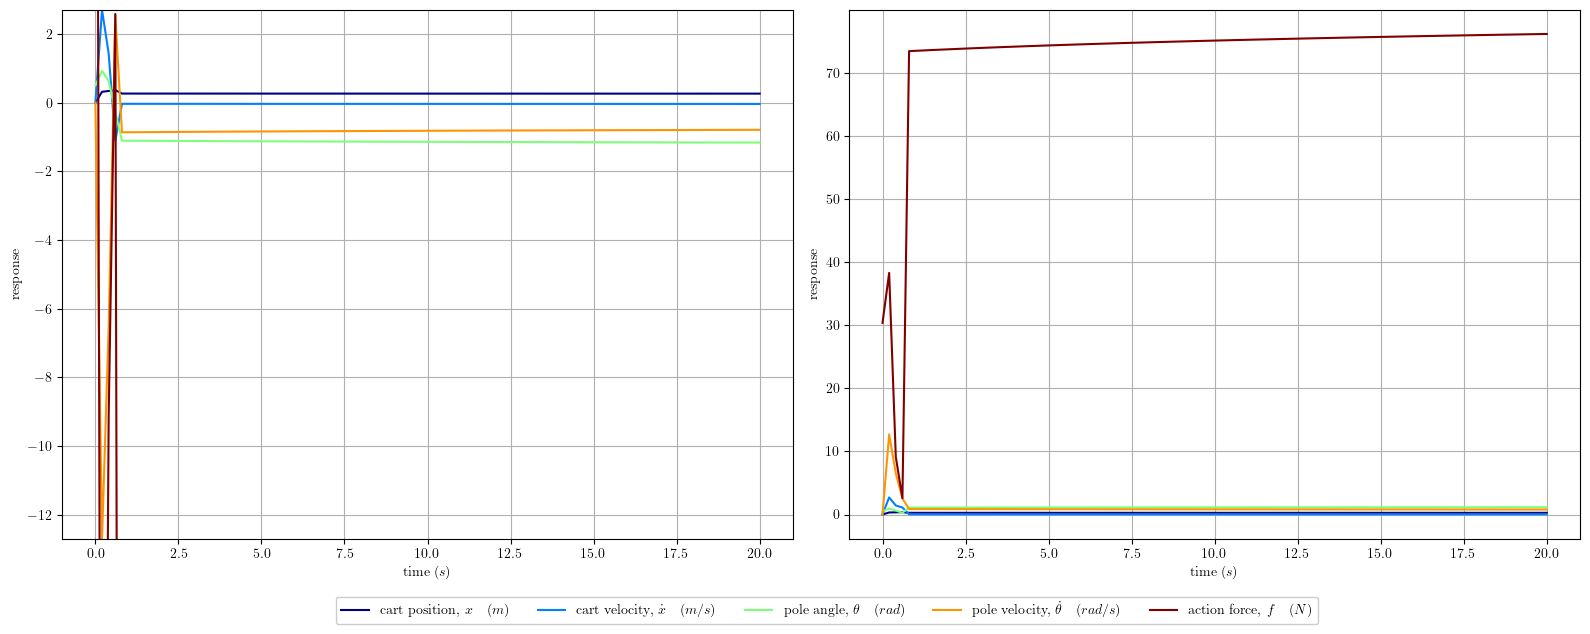

In [240]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [246]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() # Force still too high
p0[2] = p0[2] / 3.0
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 3.79010672  3.88407629 20.24790913  8.37844517]
Optimal loss: 49.588730077858585


In [245]:
controller_3.print_local_minima_losses()

Minima: (1.1370320150770654, 1.1652228873866572, 18.22311821795507, 2.513533550348093), loss: 50.39346934028737
Minima: (1.1370320150770654, 1.1652228873866572, 18.22311821795507, 2.6997212207442485), loss: 50.39346934028459
Minima: (1.1370320150770654, 1.1652228873866572, 18.22311821795507, 2.8859088911404034), loss: 50.39263265221028
Minima: (1.1370320150770654, 1.1652228873866572, 18.22311821795507, 3.0720965615365587), loss: 50.39346599079157
Minima: (1.1370320150770654, 1.1652228873866572, 19.57297882669248, 2.513533550348093), loss: 50.39346934028736
Minima: (1.1370320150770654, 1.1652228873866572, 19.57297882669248, 2.6997212207442485), loss: 50.39072819083076
Minima: (1.1370320150770654, 1.1652228873866572, 19.57297882669248, 2.8859088911404034), loss: 50.39346027159958
Minima: (1.1370320150770654, 1.1652228873866572, 19.57297882669248, 3.0720965615365587), loss: 50.39313669117012
Minima: (1.1370320150770654, 1.1652228873866572, 20.922839435429896, 2.513533550348093), loss: 50.

Eventual pole angle: 1.1500185625465276


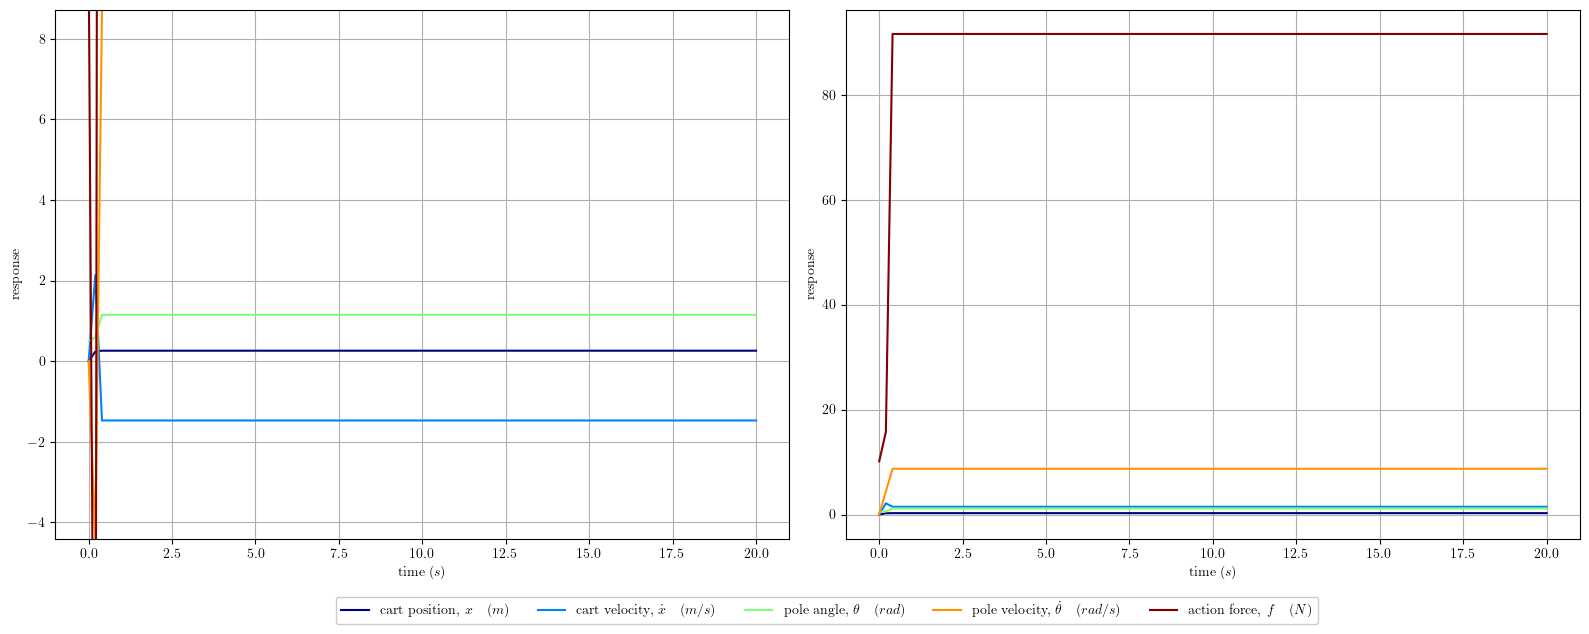

In [247]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [248]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() # Force still too high
p0[2] = p0[2] * 1.5
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 3.79010672  3.88407629 30.3718637   8.37844517]
Optimal loss: 49.588730077858585


Eventual pole angle: -3.140496202742454


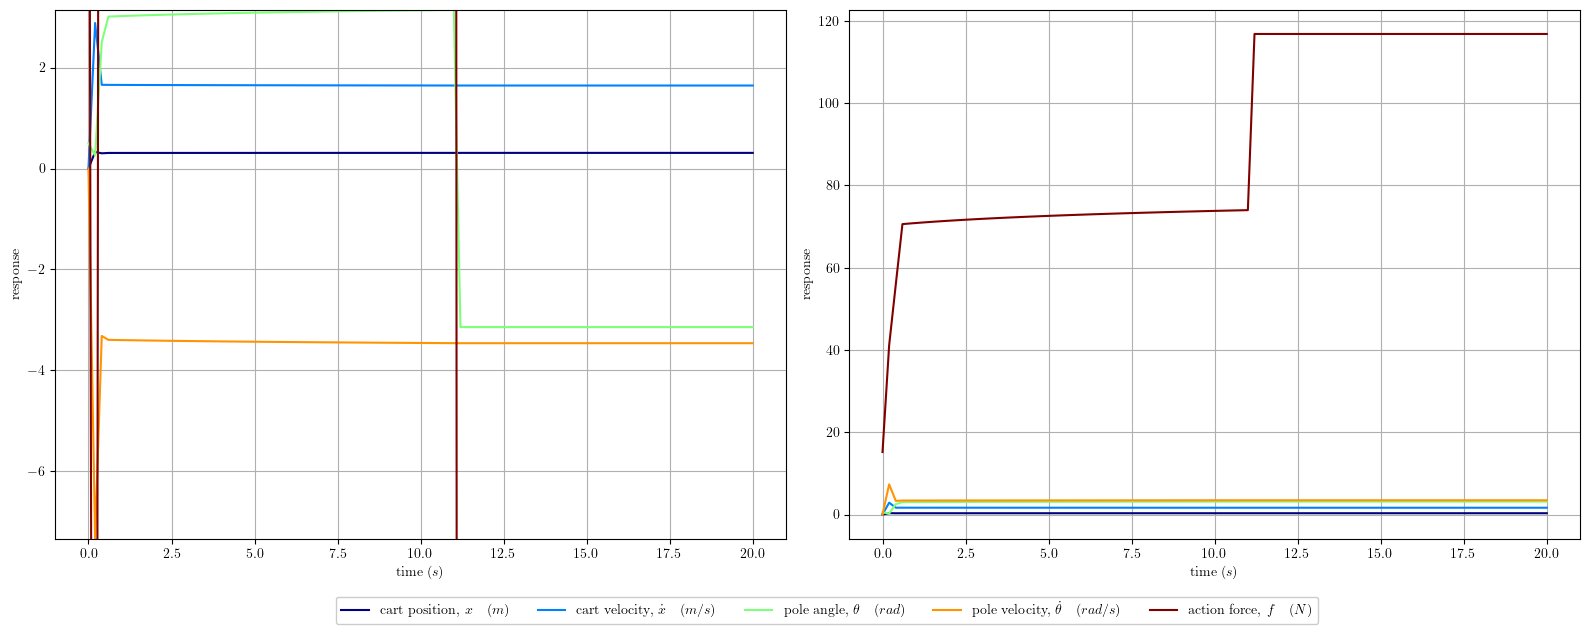

In [249]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__3.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [250]:
from sanitycheck import get_next_search_space

p0 = controller_3.get_params() # Force still too high
p0[0] = 0
limits = get_next_search_space(p0)

controller_3.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

----- RESULTS -----
No. epochs: 1
Optimal params: [ 0.          3.88407629 30.3718637   8.37844517]
Optimal loss: 49.588730077858585


Eventual pole angle: -3.140111063586522


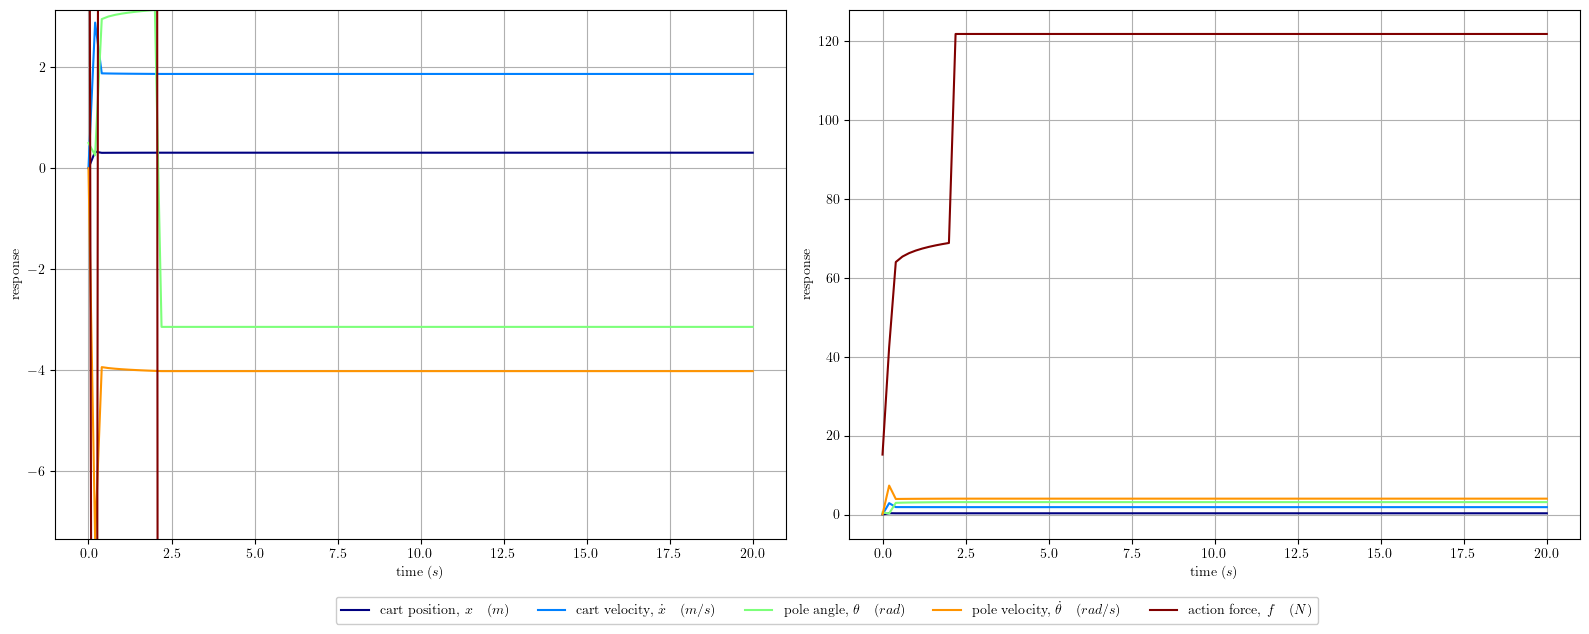

In [251]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__4.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

### Try p = [1.10893787, 2.01832636, 16.99658894, 2.91580321, 0]

In [259]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = np.array([1.10893787, 2.01832636, 16.99658894, 2.91580321])
limits = get_next_search_space(p0)

# Try constraint loss
controller_3.reset(reset_optimum=True)
controller_3.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss)



Optimal params: [ 1.05009052  1.86864696 11.92682515  2.77952358]
Optimal loss: 50.99997242827213
Optimal params: [ 0.9540988   1.68489506 11.87898087  2.47824877]
Optimal loss: 50.999972428216665
----- RESULTS -----
No. epochs: 2
Optimal params: [ 0.9540988   1.68489506 11.87898087  2.47824877]
Optimal loss: 50.999972428216665


Eventual pole angle: -2.444784861309213


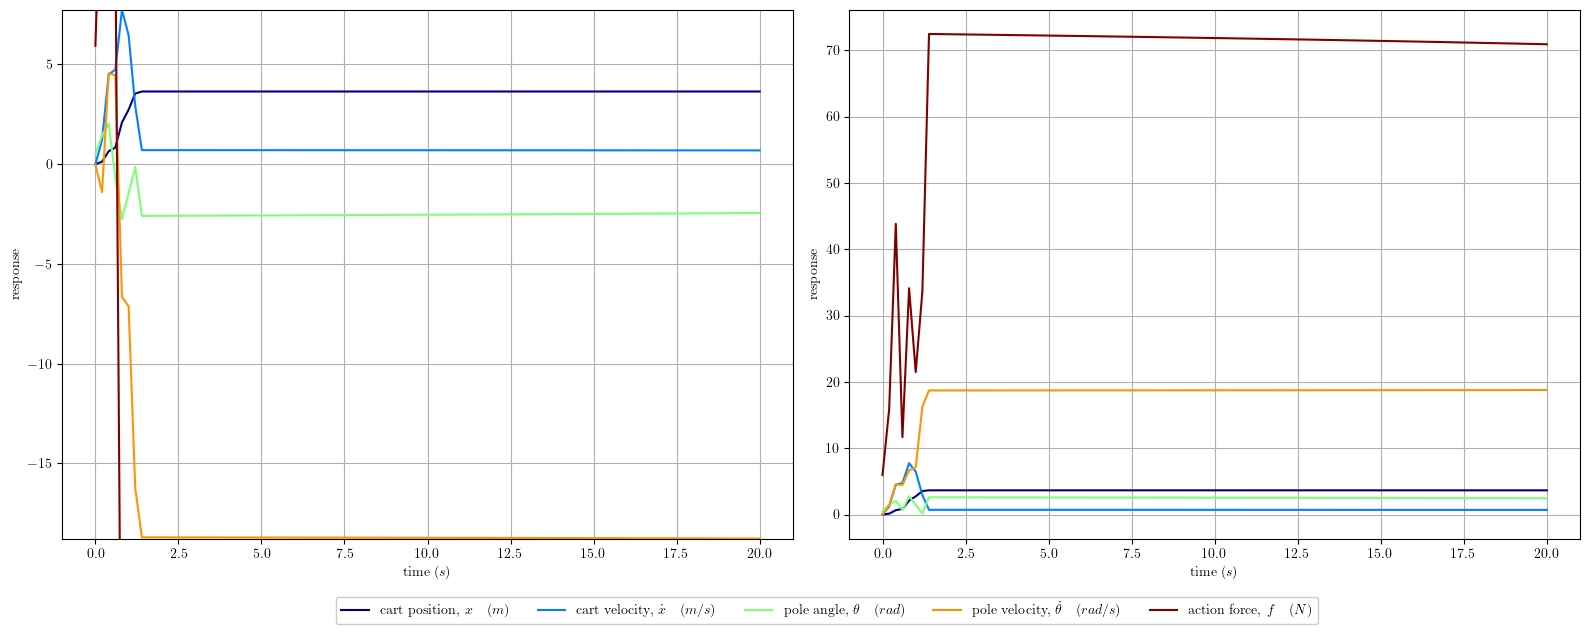

In [261]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__4.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

### Try p = [1.10893787, 2.01832636, 16.99658894, 2.91580321, 0]

In [264]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = np.array([1.10893787, 2.01832636, 16.99658894, 2.91580321])
limits = get_next_search_space(p0)

# Try constraint loss
controller_3.reset(reset_optimum=True)
controller_3.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)




Optimal params: [ 0.30417254 -1.95968322 14.18922648 13.97772742]
Optimal loss: 50.999079933199546
Optimal params: [ 0.34885268 -1.77815822 14.53517197 12.50947438]
Optimal loss: 50.999011233223605
----- RESULTS -----
No. epochs: 2
Optimal params: [ 0.34885268 -1.77815822 14.53517197 12.50947438]
Optimal loss: 50.999011233223605


Eventual pole angle: 0.4700103659807854


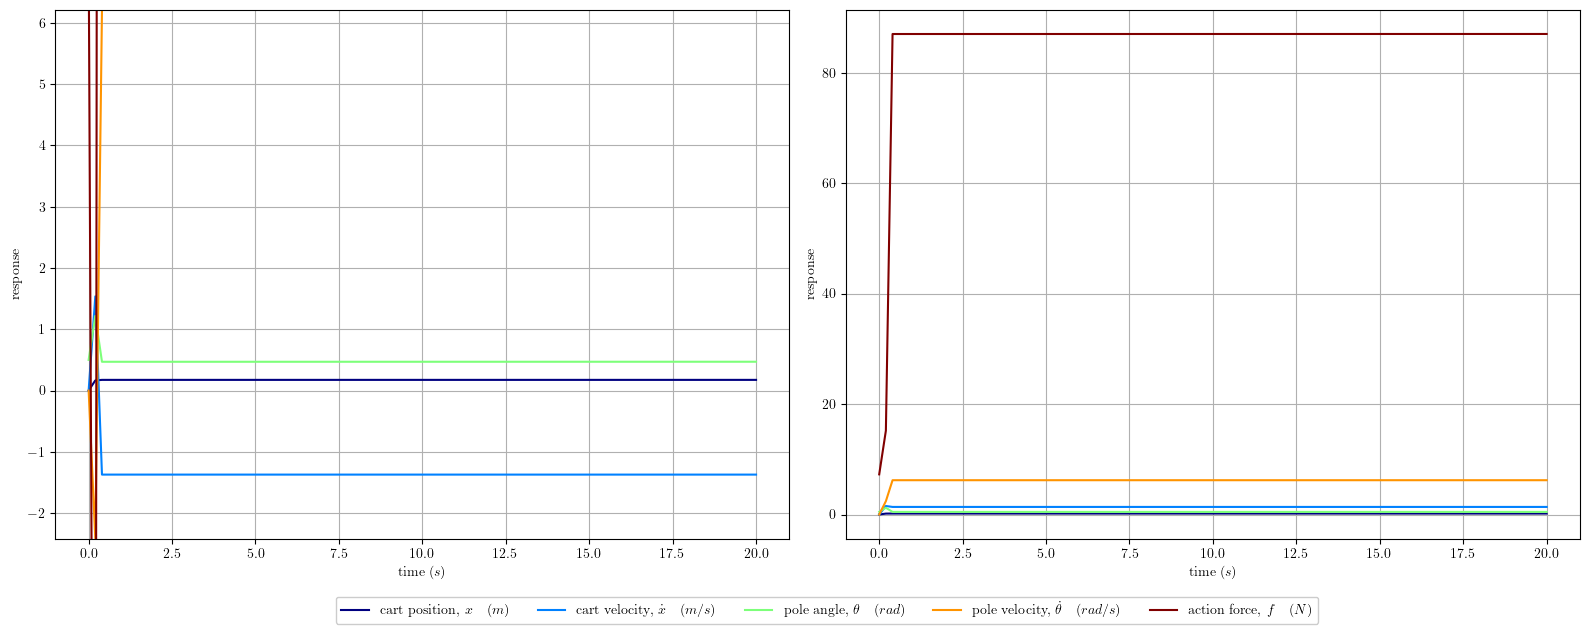

In [265]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_1__11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

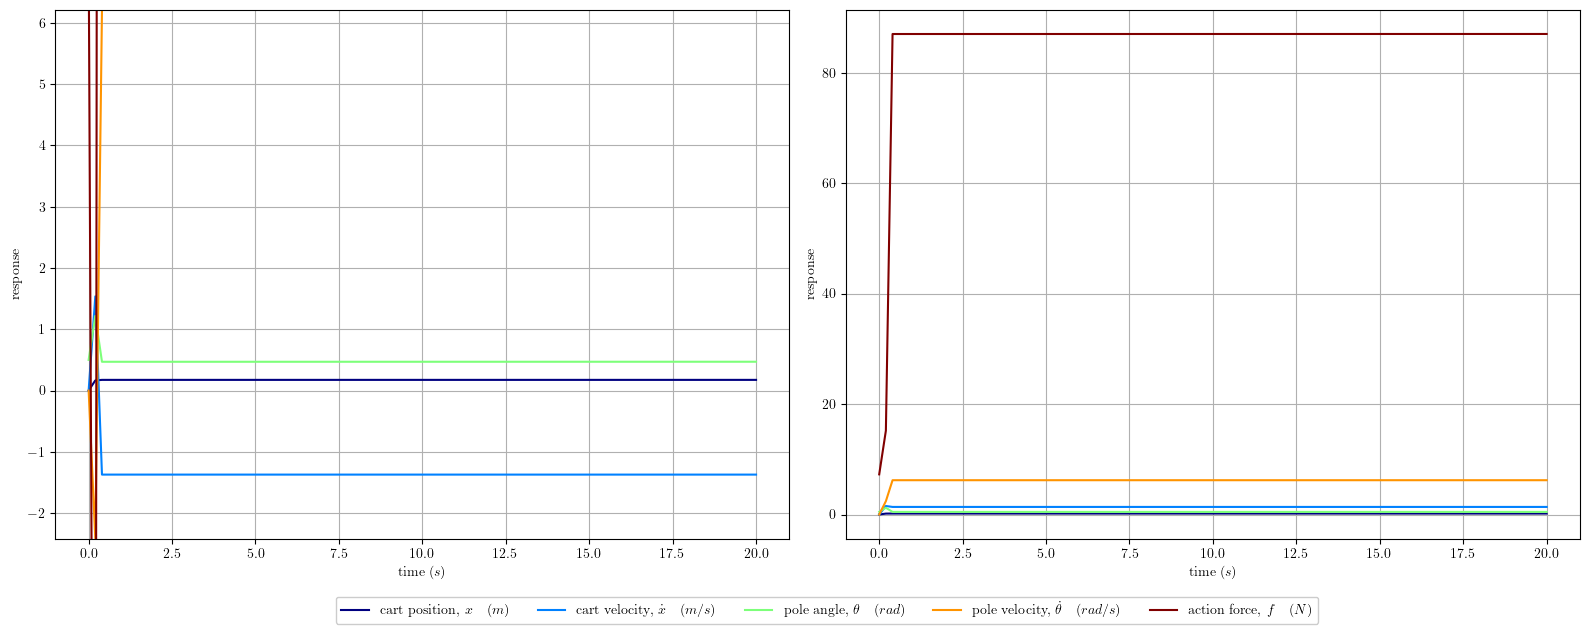

In [275]:
# Sanity check with another plotter

from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

p_opt = [ 0.34885268, -1.77815822, 14.53517197, 12.50947438]
linear_model_linear_policy_rollout(model, x0, p_opt, fig, axs, n_steps=100)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
# fig.savefig("./assets5/task3_1__100.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



### Does not work

In [273]:
# x0 = UNSTABLE_EQ
# x0[2] = 0.5
# p0 = np.array([1.10893787, 2.01832636, 16.99658894, 2.91580321])
# limits = get_next_search_space(p0)

# # Try constraint loss
# controller_3.reset(reset_optimum=True)
# controller_3.fit_global_minima_multi_level(target, x0, n_steps=50, n=4, max_epochs=10, factor=2, limits=limits, loss_func=LinearController.total_loss_5)




Optimal params: [0.99081987 2.93043515 6.25150047 1.39404437]
Optimal loss: 50.99997246355059
Optimal params: [-83.66335631  36.41197323  30.08013896  15.1340227 ]
Optimal loss: 50.99189018909419
----- RESULTS -----
No. epochs: 2
Optimal params: [-83.66335631  36.41197323  30.08013896  15.1340227 ]
Optimal loss: 50.99189018909419


Eventual pole angle: -2.7156679313741887


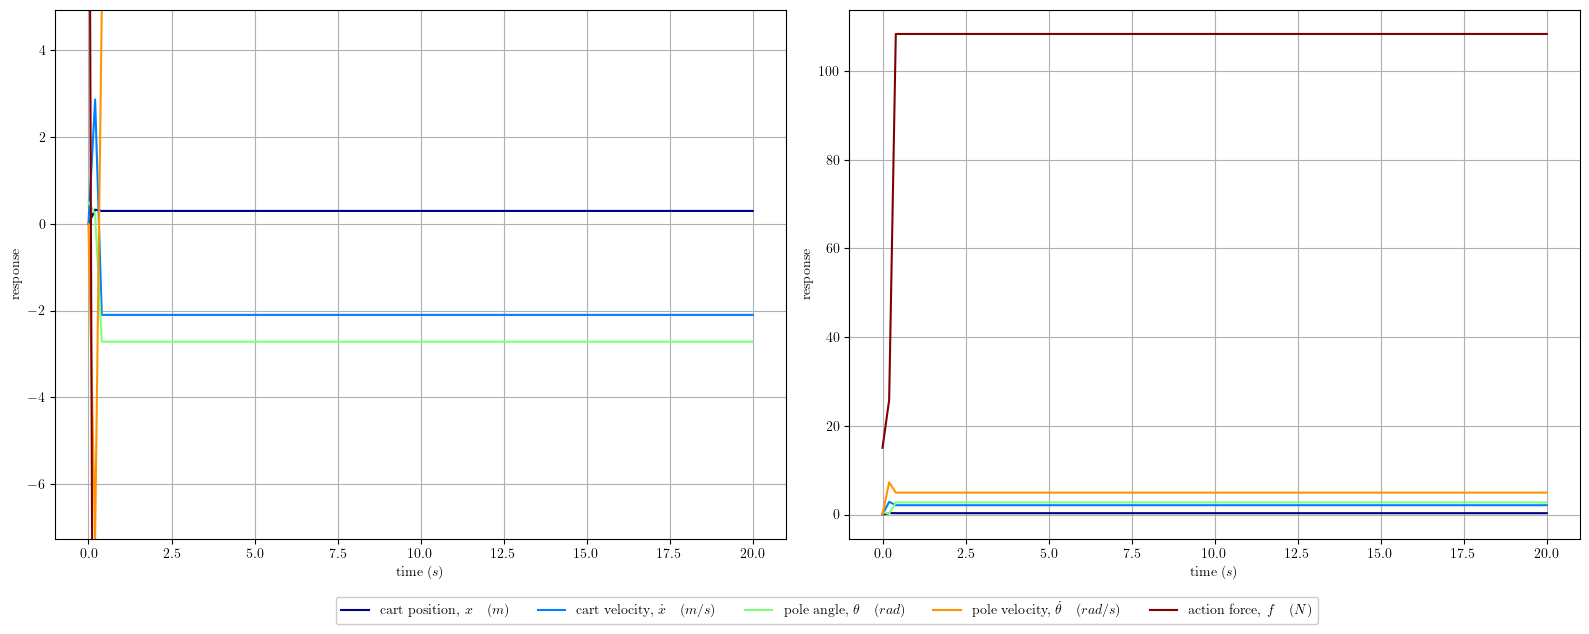

In [274]:
# from sanitycheck import linear_model_linear_policy_rollout

# fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

# steps, states_hist, action_hist, colors = controller_3.simulate_rollout(model, x0, n_steps=100)
# linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

# lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
# fig.savefig("./assets5/task3_1__12.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# print("Eventual pole angle:", states_hist[-1, 2])

# Task 3.2

In [340]:
from NonLinearObserver_ import NonLinearObserver
from CartPoleNoise_ import CartPoleGaussianNoisyObsDyn
from task4 import t3_2_check_fit_plotter

target_2 = CartPoleGaussianNoisyObsDyn(False, loc=0, scale=1)
model_2 = NonLinearObserver(False)

delta_x_hat, delta_x = model_2.fit(target_2, enable_remap=True)
print(model_2.mse)


0.004979457509245763


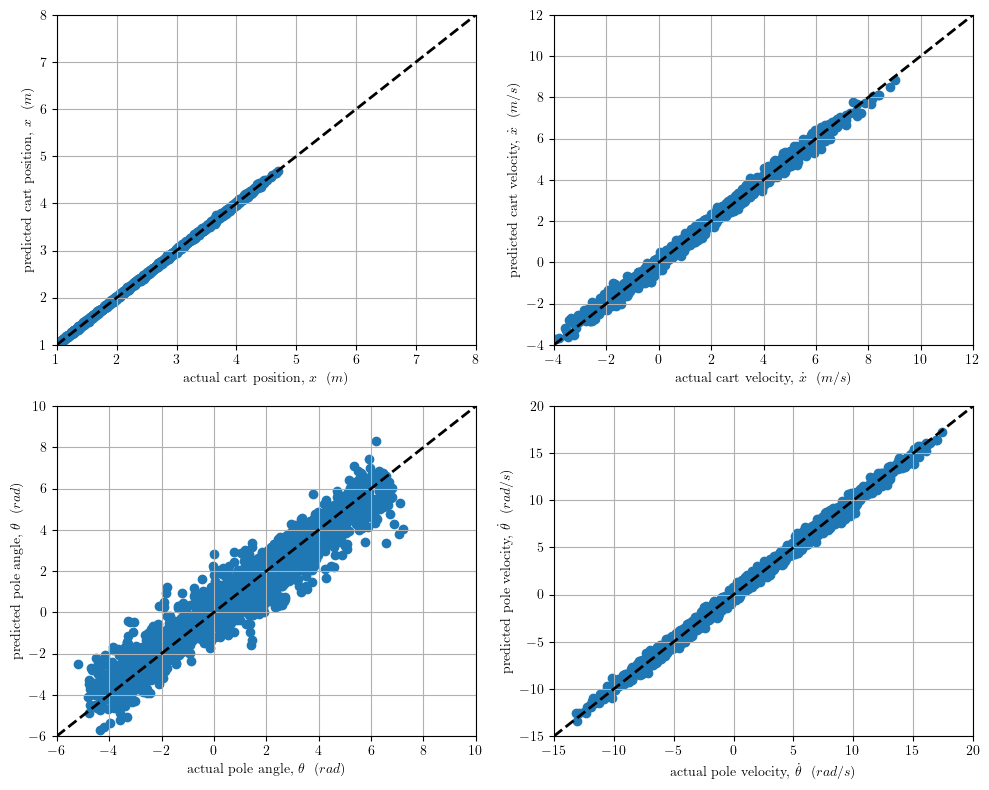

In [341]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

t3_2_check_fit_plotter(delta_x, delta_x_hat, axs, fig)

fig.savefig("./assets5/task3_2__1.png", bbox_inches='tight')

In [342]:
from LinearController_ import LinearController
from task2 import UNSTABLE_EQ


x0 = UNSTABLE_EQ
x0[2] = 0.5
print(x0)

controller_4 = LinearController.get_linear_controller()
controller_4.get_params()

[0.  0.  0.5 0. ]


array([1., 1., 1., 1.])

Point of divergence: (9.80, 389.79, 16.33), (10.00, 100.40, 16.67), (10.00, -0.75, 16.67), (10.00, 24.27, 16.67)


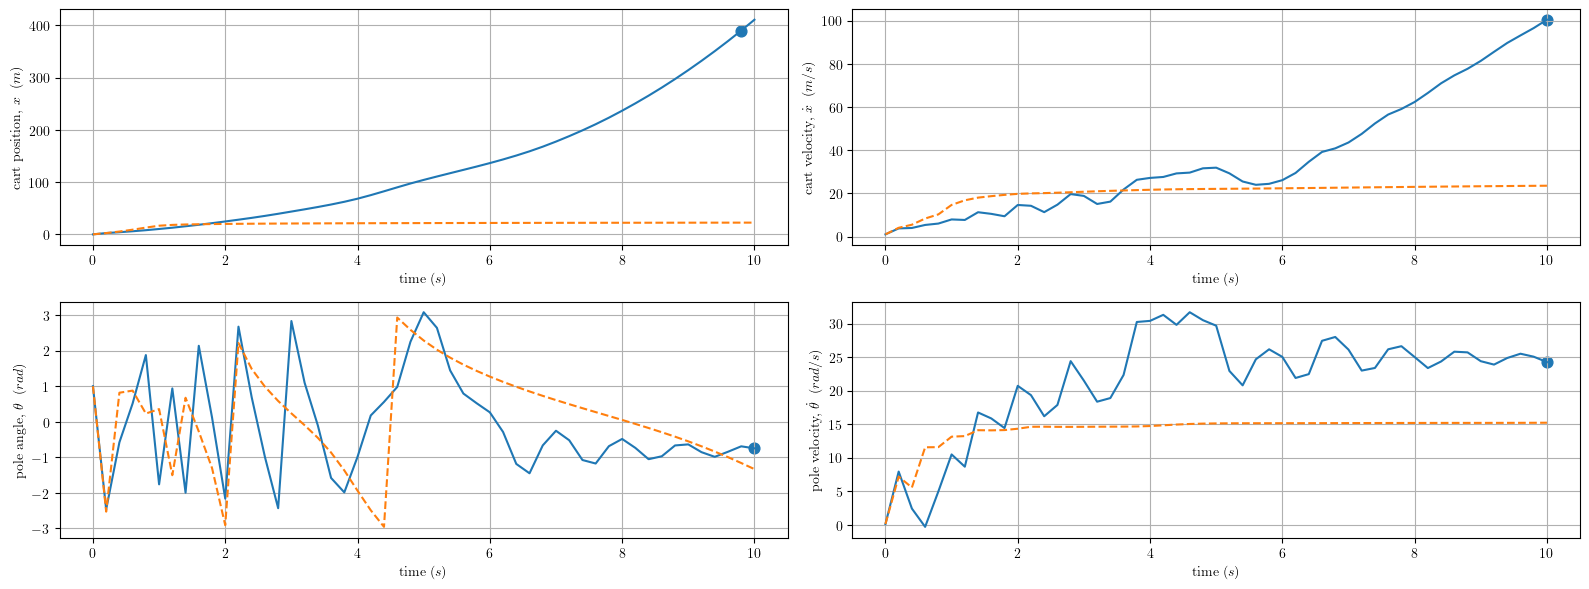

In [343]:
from sanitycheck import linear_model_linear_policy_rollout
from task2 import t2_1_roll_out

fig, axs = plt.subplots(2, 2, figsize=(16, 6), layout='tight')

x0 = np.array([0, 1, 1, 0.1])
steps, states_hist, action_hist, colors = controller_4.simulate_rollout(target_2, x0, n_steps=50, enable_remap=True, p=[0, 0, 0, 0])
steps, states_hist_hat, action_hist, colors = controller_4.simulate_rollout(model_2, x0, n_steps=50, enable_remap=True, p=[0, 0, 0, 0])

t2_1_roll_out(steps, states_hist, states_hist_hat, fig=fig, axs=axs, xlabel=r"time $(s)$")


In [358]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller_3.get_params()
limits = get_next_search_space(p0)

# Try constraint loss
controller_4.reset(reset_optimum=True)
controller_4.fit_global_minima_multi_level(target_2, x0, n_steps=50, n=4, max_epochs=10, factor=2, limits=limits, loss_func=LinearController.total_loss_3)

Optimal params: [0.9 0.9 0.9 0.9]
Optimal loss: 50.99997246355065
----- RESULTS -----
No. epochs: 2
Optimal params: [0.9 0.9 0.9 0.9]
Optimal loss: 50.99997246355065


In [359]:
from sanitycheck import get_next_search_space

p0 = controller_4.get_params()
limits = get_next_search_space(p0)

controller_4.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_3)

Optimal params: [0.81 0.81 0.99 0.81]
Optimal loss: 50.39346934027081
Optimal params: [0.729 0.729 1.089 0.729]
Optimal loss: 50.39346934026005
----- RESULTS -----
No. epochs: 2
Optimal params: [0.729 0.729 1.089 0.729]
Optimal loss: 50.39346934026005


Eventual pole angle: 2.004083450148298


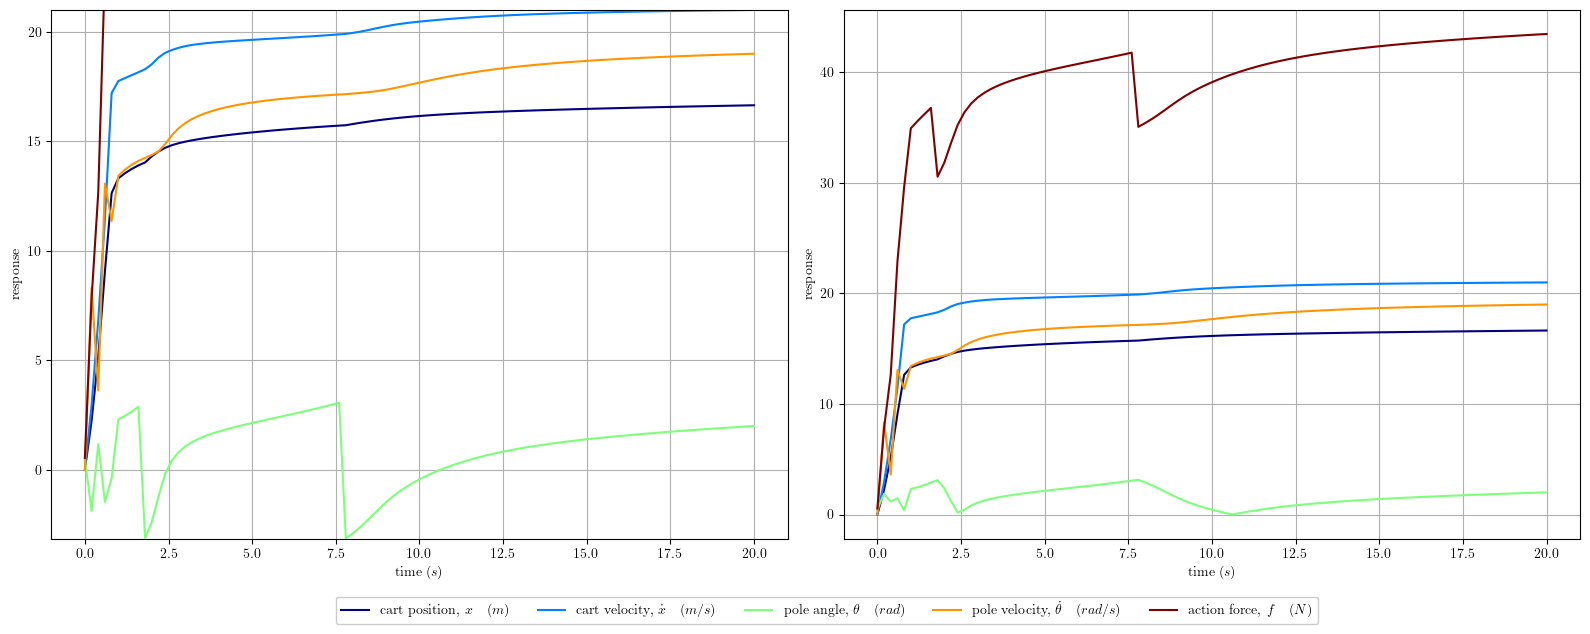

In [362]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_4.simulate_rollout(model_2, x0, n_steps=100, p=controller_4.get_params())
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_2__11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [363]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller_3.get_params()
limits = get_next_search_space(p0)

# Try constraint loss
controller_4.reset(reset_optimum=True)
controller_4.fit_global_minima_multi_level(target_2, x0, n_steps=50, n=4, max_epochs=10, factor=2, limits=limits, loss_func=LinearController.total_loss_4)

Optimal params: [ 1.89592277 -0.25461404 -1.12488183  2.16161038]
Optimal loss: 50.99997246355065
----- RESULTS -----
No. epochs: 2
Optimal params: [ 1.89592277 -0.25461404 -1.12488183  2.16161038]
Optimal loss: 50.99997246355065


In [364]:
from sanitycheck import get_next_search_space

p0 = controller_4.get_params()
limits = get_next_search_space(p0)

controller_4.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_4)

Optimal params: [ 1.95912019 -0.26310117 -1.01239364  2.23366406]
Optimal loss: 50.058459422167374
----- RESULTS -----
No. epochs: 2
Optimal params: [ 1.95912019 -0.26310117 -1.01239364  2.23366406]
Optimal loss: 50.058459422167374


Eventual pole angle: 2.03867601964489


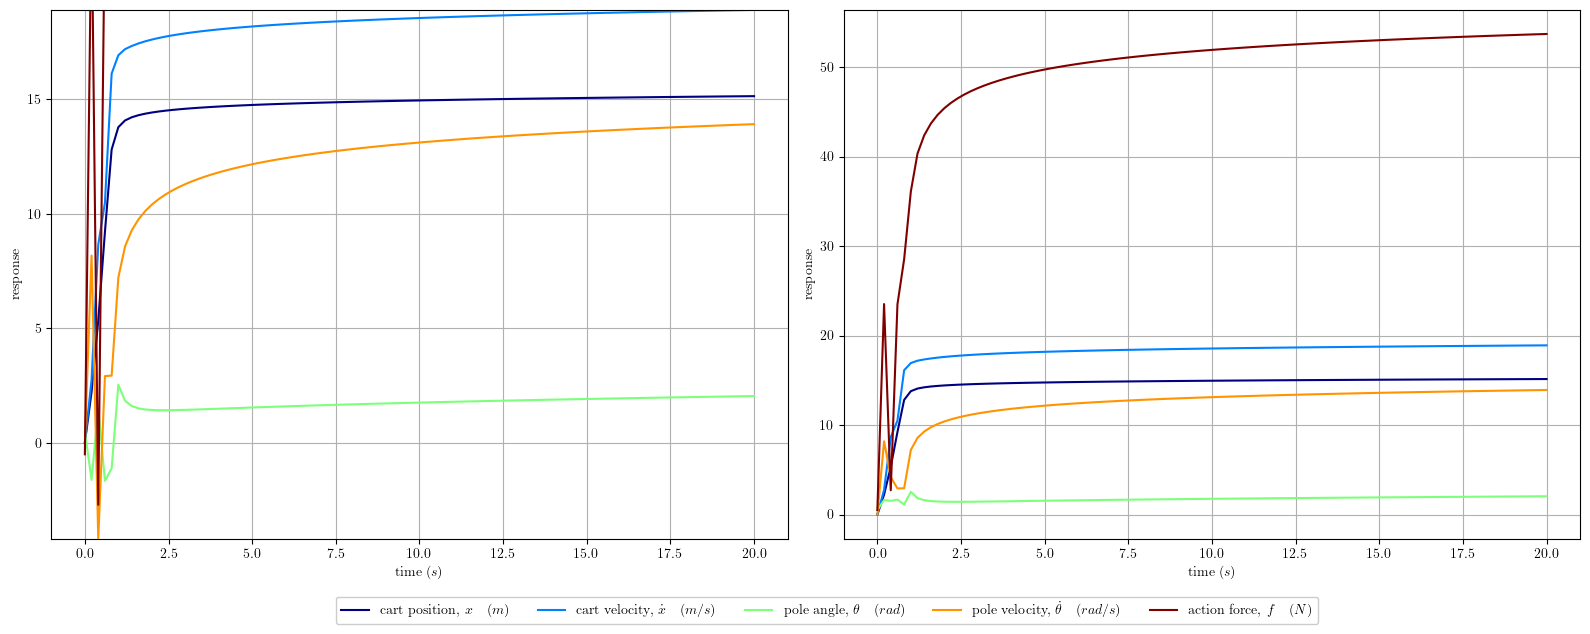

In [365]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_4.simulate_rollout(model_2, x0, n_steps=100, p=controller_4.get_params())
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_2__12.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [367]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller_2.get_params()
limits = get_next_search_space(p0)

# Try constraint loss
controller_4.reset(reset_optimum=True)
controller_4.fit_global_minima_multi_level(target_2, x0, n_steps=50, n=4, max_epochs=10, factor=2, limits=limits, loss_func=LinearController.total_loss_2)

Optimal params: [ 2.03522  2.99106 16.33689  3.78972]
Optimal loss: 50.99997246355065
----- RESULTS -----
No. epochs: 2
Optimal params: [ 2.03522  2.99106 16.33689  3.78972]
Optimal loss: 50.99997246355065


In [368]:
from sanitycheck import get_next_search_space

p0 = controller_4.get_params()
limits = get_next_search_space(p0)

controller_4.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_2)

Optimal params: [ 2.238742  2.691954 17.970579  3.663396]
Optimal loss: 50.25642007214136
Optimal params: [ 2.31336673  2.6022222  18.5695983   3.5412828 ]
Optimal loss: 49.94336709949382
Optimal params: [ 2.54470341  2.68896294 19.18858491  3.18715452]
Optimal loss: 49.78368875178556
----- RESULTS -----
No. epochs: 4
Optimal params: [ 2.54470341  2.68896294 19.18858491  3.18715452]
Optimal loss: 49.78368875178556


Eventual pole angle: 1.632012246470556


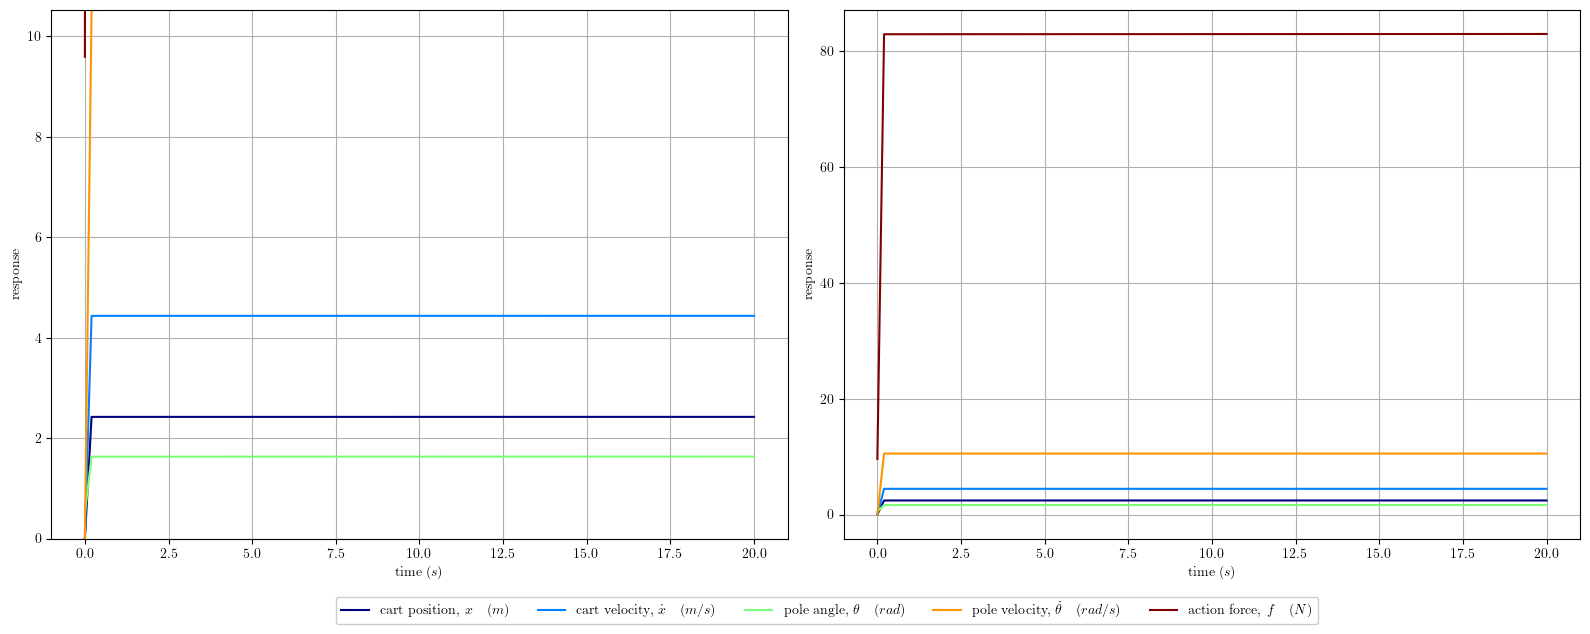

In [369]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_4.simulate_rollout(model_2, x0, n_steps=100, p=controller_4.get_params())
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_2__12.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])

In [375]:
x0 = UNSTABLE_EQ
x0[2] = 0.5
p0 = controller_2.get_params()
limits = get_next_search_space(p0)

# Try constraint loss
controller_4.reset(reset_optimum=True)
controller_4.fit_global_minima_multi_level(target_2, x0, n_steps=50, n=4, max_epochs=10, factor=2, limits=limits, loss_func=LinearController.total_loss_6)

Optimal params: [ 2.91602309  2.29483168 -6.6178308   0.92438126]
Optimal loss: 50.99997246355065
----- RESULTS -----
No. epochs: 2
Optimal params: [ 2.91602309  2.29483168 -6.6178308   0.92438126]
Optimal loss: 50.99997246355065


In [ ]:
from sanitycheck import get_next_search_space

p0 = controller_4.get_params()
limits = get_next_search_space(p0)

controller_4.fit_global_minima_multi_level(model, x0, n_steps=50, n=4, max_epochs=10, factor=10, limits=limits, loss_func=LinearController.total_loss_6)

Eventual pole angle: -1.246074876013708


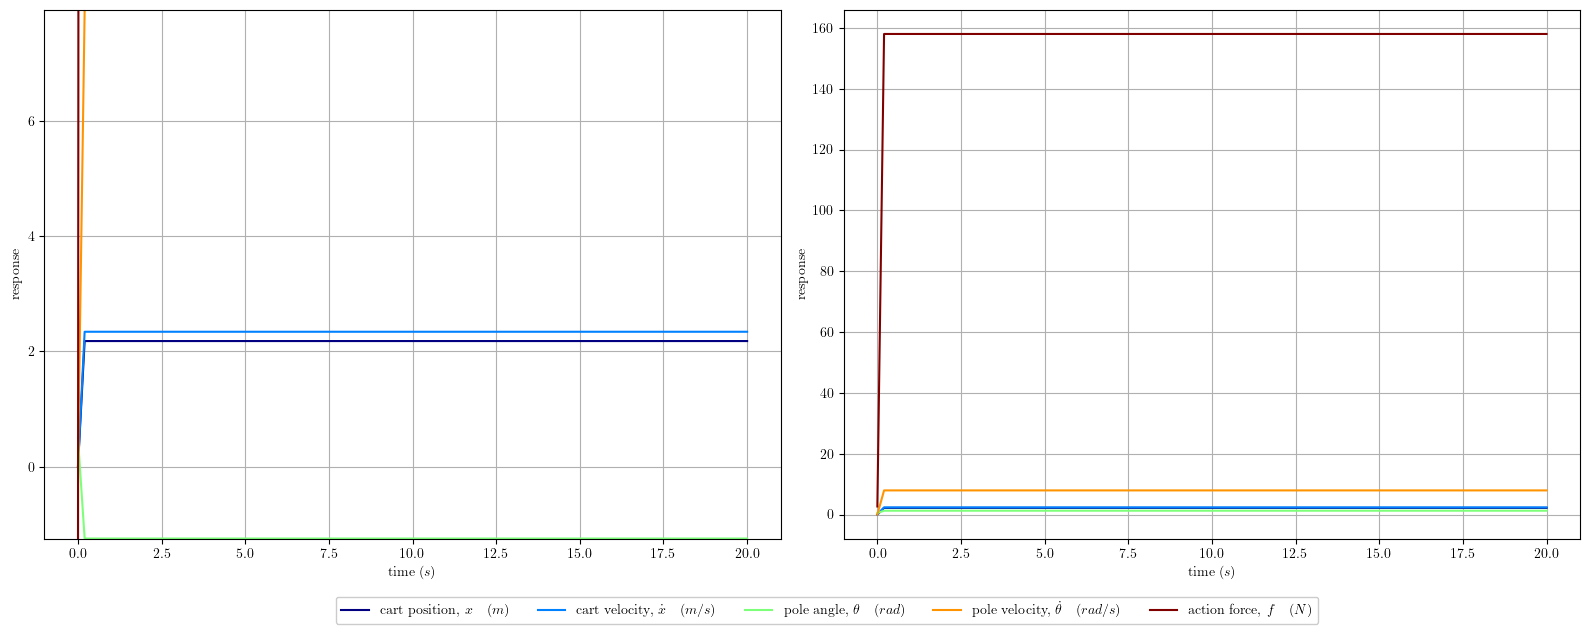

In [377]:
from sanitycheck import linear_model_linear_policy_rollout

fig, axs = plt.subplots(1, 2, figsize=(16, 6), layout='tight')

steps, states_hist, action_hist, colors = controller_4.simulate_rollout(model_2, x0, n_steps=100, p=controller_4.get_params())
linear_model_linear_policy_rollout_plotter(steps, states_hist, action_hist, fig, axs, colors)

lgd = fig.legend(loc="lower center", ncol=5, framealpha=1, bbox_to_anchor=(0.52, -0.06))
fig.savefig("./assets5/task3_2__14.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

print("Eventual pole angle:", states_hist[-1, 2])